# Оценка жанров и платформ для интернет-магазина компьютерных игр

## Описание проекта

   Интернет-магазину компьютерных игр необходимо спланировать рекламные кампании. Для этого на основе исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах нужно выявить определяющие успешность игры закономерности. Все данные доступны в открытых источниках. Это позволит сделать ставку на потенциально популярный продукт и таким образом спланировать рекламные кампании.
     
   В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель исследования

Определить популярность жанров и платформ для компьютерных игр с целью распределения долей в рекламном бюджете компании.  

### Ход исследования

* Обзор данных - загрузка данных и изучение их структуры, общей информации.
* Предобработка данных - обработка пропусков, проверка на наличие ошибок, которые могут повлиять на результаты исследования, поиск возможности исправления наиболее критичных ошибок, оптимизация типа данных.
* Проведение необходимых для анализа расчетов дополнительных параметров.  
* Проведение исследовательского анализа данных.
* Проверка статистических гипотез - формулирование гипотез, проведение анализа и формулирование выводов по проведенному исследованию.
* Оформление выводов и результатов исследовательского проекта.

### Дальнейшее применение

Полученные в результате исследования выводы и данные будут использованы в рамках планирования рекламной кампании на следующий год и распределения рекламного бюджета по продуктам.

## Загрузка и обзор данных

Импорт необходимых библиотек и чтение данных. В случае ошибки выгрузки данных, на экран будет выведено соответствующее сообщение.

In [1]:
!pip install sidetable

#импорты из стандартной библиотеки

import warnings

# библиотеки для работы с данными

import numpy as np
import pandas as pd
import re
import scipy.stats as st
import sidetable

# библиотеки для визуализации

import matplotlib.pyplot as plt
import plotly.express as px # для построения двойных гистограмм и боксплотов
import plotly.graph_objects as go
import seaborn as sb

#настройки

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.float_format', '{:,.2f}'.format) #формат вывода вещдественных чисел - 2 знака после запятой
warnings.filterwarnings("ignore")

# константы


In [2]:
! gdown --id 1G4_DLV0gEKZoxewl1NhqsvM5IEaGVb6z

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1G4_DLV0gEKZoxewl1NhqsvM5IEaGVb6z
To: /content/games.csv
100% 1.18M/1.18M [00:00<00:00, 32.0MB/s]


In [3]:
try:
    df = pd.read_csv('games.csv')
except:
    print('Ошибка чтения файла games.csv!')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [6]:
display(df['Rating'].value_counts())

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

**Вывод:**
* 1) В названии столбцов встречается верхний регистр. Приведем названия столбцов к нижному регистру.
* 2) Для обработки явных дубликатов приведем значения в столбцах Name, Platform, Genre к нижнему регистру.
* 3) Что касается пропусков: в столбцах Name и Genre по два пропуска, в столбце Year_of_Release около 300 пропущенных значений. Много пропущенных значений по рейтинговым данных. Оценим возможность заполнения пропусков и проведем данную операцию, если такое представляется возможным.
* 4) Для оптимизации работы с таблицей и возможности обработки рейтинговых показателей по столбцу User_Score проведем преобразование типов данных.
* 5) Необходимо также провести исследование данных на предмет полных дубликатов.

## Подготовка данных

### Предобработка данных

#### Переименование столбцов

In [7]:
df.columns = df.columns.str.lower().str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Наименования столбцов приведены в нижний регистр. Удалены лишние пробелы в наименованиях столбцов, если они были.

#### Обработка явных дубликатов

Для обработки явных дубликатов приведем названия в категориальных переменных (столбцы name, platform, genre) к нижнему регистру и уберем пробелы слева и справа от наименования.

In [8]:
column_names = ['name', 'platform', 'genre']
for i in column_names:
    df[i] = df[i].str.lower().str.strip()
    print('Уникальные значения столбца', i)
    print(df[i].unique(), end = '\n\n')

Уникальные значения столбца name
['wii sports' 'super mario bros.' 'mario kart wii' ...
 'woody woodpecker in crazy castle 5' 'lma manager 2007'
 'haitaka no psychedelica']

Уникальные значения столбца platform
['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']

Уникальные значения столбца genre
['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy' nan]



#### Обработка пропусков

Посмотрим, сколько пропущено строк по каждому столбцу суммарно и в процентном соотношении.

In [9]:
df.stb.missing()

,missing,total,percent
critic_score,8578,16715,51.32
rating,6766,16715,40.48
user_score,6701,16715,40.09
year_of_release,269,16715,1.61
name,2,16715,0.01
genre,2,16715,0.01
platform,0,16715,0.00
na_sales,0,16715,0.00
eu_sales,0,16715,0.00
jp_sales,0,16715,0.00


Посмотрим пропуски в столбцах name и genre.

In [10]:
df.loc[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
%%time
print('Суммарные продажи по регионам различных жанров и кол-во уникальных наименований игр в жанре:')
df['genre'] = df['genre'].fillna('unkonwn')
pivot_genre_nan = df.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'name'],
    aggfunc = {'na_sales': 'sum', 'eu_sales': np.sum, 'jp_sales': np.sum, 'other_sales': np.sum,
               'name': 'nunique'})
display(pivot_genre_nan)

Суммарные продажи по регионам различных жанров и кол-во уникальных наименований игр в жанре:


,eu_sales,jp_sales,na_sales,name,other_sales
genre,,,,,
action,519.13,161.43,879.01,1957,184.60
adventure,63.54,52.30,105.26,1062,16.49
fighting,100.33,87.48,223.36,613,36.36
misc,212.74,108.11,407.27,1330,74.39
platform,200.35,130.83,445.50,588,51.09
puzzle,50.01,57.31,122.87,498,12.38
racing,236.51,56.71,359.35,772,76.10
role-playing,188.71,355.41,330.81,1226,59.63
shooter,317.34,38.76,592.24,825,104.11


CPU times: user 26.4 ms, sys: 0 ns, total: 26.4 ms
Wall time: 35.6 ms


In [12]:
print('Суммарные продажи по регионам различных жанров и кол-во уникальных наименований игр в жанре:')
df['genre'] = df['genre'].fillna('unkonwn')
pivot_genre_nan = df.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'name'],
    aggfunc = {'na_sales': np.sum, 'eu_sales': np.sum, 'jp_sales': np.sum, 'other_sales': np.sum,
               'name': lambda x: x.nunique()})
display(pivot_genre_nan)

Суммарные продажи по регионам различных жанров и кол-во уникальных наименований игр в жанре:


,eu_sales,jp_sales,na_sales,name,other_sales
genre,,,,,
action,519.13,161.43,879.01,1957,184.60
adventure,63.54,52.30,105.26,1062,16.49
fighting,100.33,87.48,223.36,613,36.36
misc,212.74,108.11,407.27,1330,74.39
platform,200.35,130.83,445.50,588,51.09
puzzle,50.01,57.31,122.87,498,12.38
racing,236.51,56.71,359.35,772,76.10
role-playing,188.71,355.41,330.81,1226,59.63
shooter,317.34,38.76,592.24,825,104.11


Так как информации по жанру unkonwn очень мало: знаем наименование платформы и год выпуска. Продажи очень незначительные и нет данных по рейтингам и даже наименования игр.

**Вывод:**

Предлагаю удалить эти две позиции.

In [13]:
df.drop(df.loc[df['genre'] == 'unkonwn'].index, inplace = True) #удаляем строки с неизвестным жанром
df.reset_index(inplace = True, drop = True) # переиндексируем таблицу, старые индексы удаляем

Рассмотрим пропуски в столбце year_of_release.

In [14]:
print('Всего пропусков в столбце год выпуска: ',
      df.year_of_release.isna().sum(),
      'строк, или {:.0%}'.format(df.year_of_release.isna().sum()/len(df.year_of_release)))

Всего пропусков в столбце год выпуска:  269 строк, или 2%


In [15]:
print('Суммарные продажи по строкам с незаполненным годом релиза, их доля:')
print('')
print('В Сев Америке: ',
      df.query('year_of_release == "NaN"')['na_sales'].sum(),
      '(млн копий) или {:.0%}'.format(df.query('year_of_release == "NaN"')['na_sales'].sum() / df['na_sales'].sum()))

print('В Европе: ',
      df.query('year_of_release == "NaN"')['eu_sales'].sum(),
      '(млн копий) или {:.0%}'.format(df.query('year_of_release == "NaN"')['eu_sales'].sum() / df['eu_sales'].sum()))

print('В Японии: {:.2f}'.format(df.query('year_of_release == "NaN"')['jp_sales'].sum()),
      '(млн копий) или {:.0%}'.format(df.query('year_of_release == "NaN"')['jp_sales'].sum() / df['jp_sales'].sum()))

print('В др странах: {:.2f}'.format(df.query('year_of_release == "NaN"')['other_sales'].sum()),
      '(млн копий) или {:.0%}'.format(df.query('year_of_release == "NaN"')['other_sales'].sum() / df['other_sales'].sum()))

Суммарные продажи по строкам с незаполненным годом релиза, их доля:

В Сев Америке:  0.0 (млн копий) или 0%
В Европе:  0.0 (млн копий) или 0%
В Японии: 0.00 (млн копий) или 0%
В др странах: 0.00 (млн копий) или 0%


Тк кол-во строк и сумма продаж по данной категории незначительны, предлагаю удалить строки с пропусками в столбце year_of_release.

In [16]:
df = df.dropna(subset = ['year_of_release']) #удаляем строки с неопределенным годом релиза
df.reset_index(inplace = True, drop = True) # переиндексируем таблицу, старые индексы удаляем

In [17]:
df.describe(include = ['object', 'float64']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,16444,11426,need for speed: most wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,16444,31,ps2,2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_release,"16,444.00",NaN,NaN,NaN,"2,006.49",5.88,"1,980.00","2,003.00","2,007.00","2,010.00","2,016.00"
genre,16444,12,action,3307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,"16,444.00",NaN,NaN,NaN,0.26,0.82,0.00,0.00,0.08,0.24,41.36
eu_sales,"16,444.00",NaN,NaN,NaN,0.15,0.51,0.00,0.00,0.02,0.11,28.96
jp_sales,"16,444.00",NaN,NaN,NaN,0.08,0.31,0.00,0.00,0.00,0.04,10.22
other_sales,"16,444.00",NaN,NaN,NaN,0.05,0.19,0.00,0.00,0.01,0.03,10.57
critic_score,"7,983.00",NaN,NaN,NaN,68.99,13.92,13.00,60.00,71.00,79.00,98.00
user_score,9839,96,tbd,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим пропуски в столбцах с оценками critic_score и user_score.

In [18]:
print('Пропусков в столбце critic_score:',
      df.critic_score.isna().sum(), 'строк, или {:.0%}'
      .format(df.critic_score.isna().sum() / len(df.critic_score)))

print('Пропусков в столбце user_score:',
      df.user_score.isna().sum(), 'строк, или {:.0%}'
      .format(df.user_score.isna().sum() / len(df.user_score)))

print('Значений tbd - to be determined - в столбце user_score:',
      len(df.query('user_score == "tbd"')), 'строк, или {:.0%}'
      .format(len(df.query('user_score == "tbd"')) / len(df.user_score)))

Пропусков в столбце critic_score: 8461 строк, или 51%
Пропусков в столбце user_score: 6605 строк, или 40%
Значений tbd - to be determined - в столбце user_score: 2376 строк, или 14%


Обработаем пропуски в столбцах с оценками критиков и пользователей. Значения tbd (to be determined) представляют собой тоже неопределенные значения, которые должны быть определены. Их достаточно много, поэтому предлагаю заполнить средним арифметическим по соответствующим категориям "жанр/платформа". Предварительно приведем значения tbd к NaN.

In [19]:
df.user_score.value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [20]:
df.replace({'user_score': 'tbd'}, np.NaN, inplace = True) # значения в столбце tbd переводим в NaN
df['user_score'] = df['user_score'].astype('float32', errors = 'ignore') # меняем тип данных для возможности последующего заполнения пустых значений
print('Всего пропусков в столбце user_score с учетом tbd:', df.user_score.isna().sum(), 'строк, или {:.0%}'.format(df.user_score.isna().sum() / len(df.user_score)))

Всего пропусков в столбце user_score с учетом tbd: 8981 строк, или 55%


Заполним пропуски в столбцах critic_score и user_score средним арифметическим по соответствующим категориям "жанр/платформа", где это возможно.

In [21]:
df['critic_score'] = df['critic_score'].fillna(
    df.groupby(['genre', 'platform'])['critic_score'].transform('mean'))

df['user_score'] = df['user_score'].fillna(
    df.groupby(['genre', 'platform'])['user_score'].transform('mean'))

print('Пропусков в столбце critic_score:',
      df.critic_score.isna().sum(), 'строк, или {:.0%}'
      .format(df.critic_score.isna().sum() / len(df.critic_score)))

print('Пропусков в столбце user_score:',
      df.user_score.isna().sum(), 'строк, или {:.0%}'
      .format(df.user_score.isna().sum() / len(df.user_score)))

Пропусков в столбце critic_score: 1111 строк, или 7%
Пропусков в столбце user_score: 1104 строк, или 7%


Остальные пропуски некритичны в массе. Предлагаю удалить.

In [22]:
df = df.dropna(subset = ['critic_score']) #удаляем строки с неопределенным значением critic_score
df.reset_index(inplace = True, drop = True) # переиндексируем таблицу, старые индексы удаляем

print('Пропусков в столбце critic_score:',
      df.critic_score.isna().sum(), 'строк, или {:.0%}'
      .format(df.critic_score.isna().sum() / len(df.critic_score)))

print('Пропусков в столбце user_score:',
      df.user_score.isna().sum(), 'строк, или {:.0%}'
      .format(df.user_score.isna().sum() / len(df.user_score)))

print('Пропусков в столбце rating:',
      df.rating.isna().sum(), 'строк, или {:.0%}'
      .format(df.rating.isna().sum() / len(df.rating)))

Пропусков в столбце critic_score: 0 строк, или 0%
Пропусков в столбце user_score: 0 строк, или 0%
Пропусков в столбце rating: 5566 строк, или 36%


Пропуски по столбцу rating определить не представляется возможным даже для игр с одинаковым названием и годом выпуска. Это могут быть игры, предназначенные для разных возрастных категорий. Если идет полное совпадение, в тч по столбцу rating, тогда это будут полные дубликаты, которые подлежат удалению.
Заполним пропуски в столбце rating на значение unknown.

In [23]:
df['rating'] = df['rating'].fillna('unknown')

print('Пропусков в столбце rating:',
      df.rating.isna().sum(), 'строк, или {:.0%}'
      .format(df.rating.isna().sum() / len(df.rating)))

df.stb.missing()

Пропусков в столбце rating: 0 строк, или 0%


,missing,total,percent
name,0,15333,0.00
platform,0,15333,0.00
year_of_release,0,15333,0.00
genre,0,15333,0.00
na_sales,0,15333,0.00
eu_sales,0,15333,0.00
jp_sales,0,15333,0.00
other_sales,0,15333,0.00
critic_score,0,15333,0.00
user_score,0,15333,0.00


**Вывод:**
Все пропуски обработаны. Итоговая таблица с данными выглядит следующим образом.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15333 entries, 0 to 15332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15333 non-null  object 
 1   platform         15333 non-null  object 
 2   year_of_release  15333 non-null  float64
 3   genre            15333 non-null  object 
 4   na_sales         15333 non-null  float64
 5   eu_sales         15333 non-null  float64
 6   jp_sales         15333 non-null  float64
 7   other_sales      15333 non-null  float64
 8   critic_score     15333 non-null  float64
 9   user_score       15333 non-null  float32
 10  rating           15333 non-null  object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.2+ MB


#### Преобразование типов данных

Проведем преобразование типов данных.

In [25]:
df['year_of_release'] = df['year_of_release'].astype('int32', errors = 'ignore')
df['na_sales'] = df['na_sales'].astype('float32', errors = 'ignore')
df['eu_sales'] = df['eu_sales'].astype('float32', errors = 'ignore')
df['jp_sales'] = df['jp_sales'].astype('float32', errors = 'ignore')
df['other_sales'] = df['other_sales'].astype('float32', errors = 'ignore')
df['critic_score'] = df['critic_score'].astype('float32', errors = 'ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15333 entries, 0 to 15332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15333 non-null  object 
 1   platform         15333 non-null  object 
 2   year_of_release  15333 non-null  int32  
 3   genre            15333 non-null  object 
 4   na_sales         15333 non-null  float32
 5   eu_sales         15333 non-null  float32
 6   jp_sales         15333 non-null  float32
 7   other_sales      15333 non-null  float32
 8   critic_score     15333 non-null  float32
 9   user_score       15333 non-null  float32
 10  rating           15333 non-null  object 
dtypes: float32(6), int32(1), object(4)
memory usage: 898.5+ KB


In [26]:
df.head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,E
2,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E
3,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,E
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,E
5,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.00,8.40,E
6,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,62.04,6.71,unknown


**Вывод:**
Типы данных заменены корректно. Таблица стала занимать меньше оперативной памяти. Работа с ней в дальнейшем оптимизирована.

#### Обработка полных дубликатов

Посмотрим, присутствуют ли в данных полные дубликаты.

In [27]:
df.duplicated().sum()

0

**Вывод:**
Полных дубликатов не обнаружено.

### Предварительные расчеты

Соберем суммарные продажи игр по всем регионам в отдельный столбец total_sales для проведения дальнейшего анализа данных.

In [28]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
2,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
3,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
5,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
6,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,62.04,6.71,unknown,24.67


## Исследовательский анализ данных

### Оценка кол-ва выпущенных игр по годам

In [29]:
df_year_release = df.pivot_table(index = 'year_of_release',
                                 values = ['name', 'total_sales'],
                                 aggfunc = {'name': 'count', 'total_sales': 'sum'})
df_year_release = df_year_release.rename({'name': 'games_count'}, axis=1)
display(df_year_release)

,games_count,total_sales
year_of_release,,
1985,2,0.06
1988,1,0.03
1992,5,3.03
1994,23,18.90
1995,101,40.18
1996,168,105.28
1997,194,147.44
1998,262,176.05
1999,221,154.43


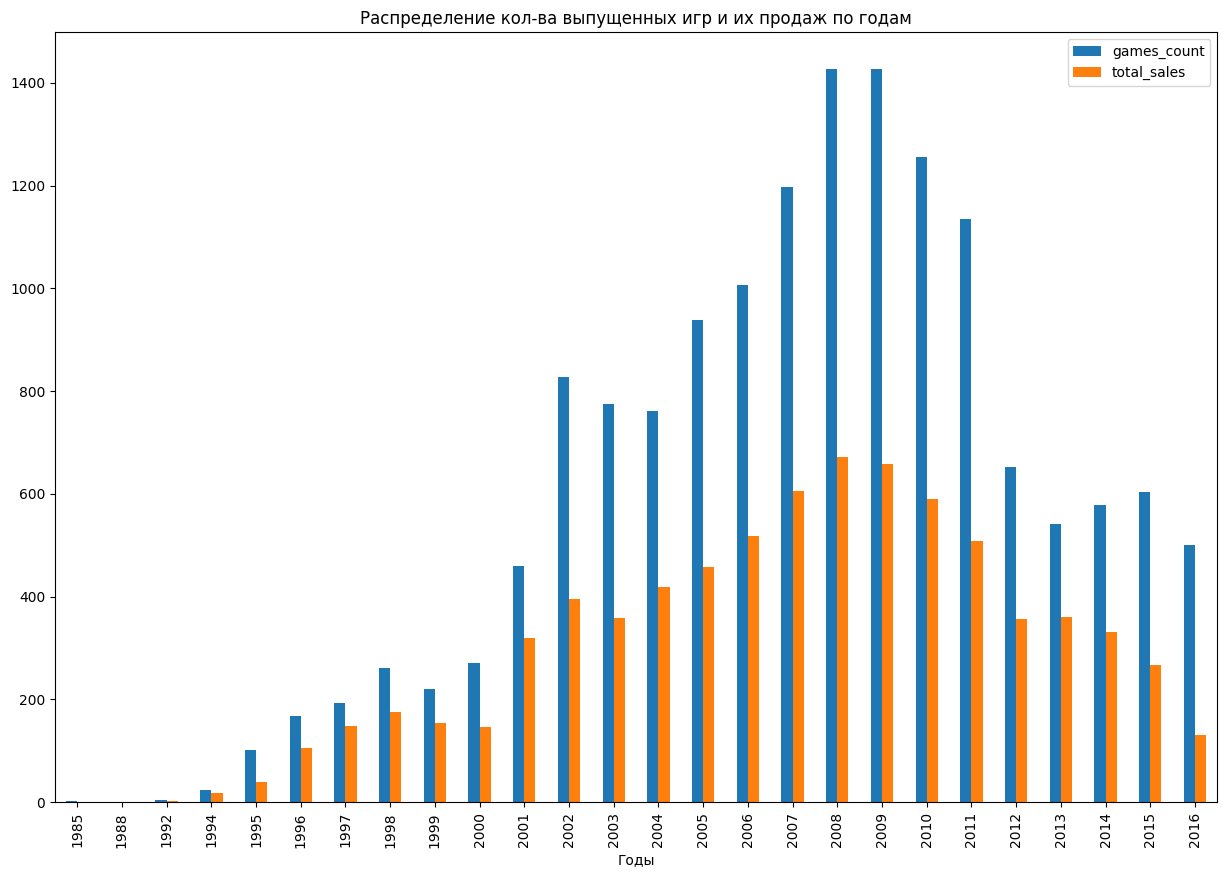

In [30]:
df_year_release.plot(kind = 'bar', figsize=(15, 10))
plt.title('Распределение кол-ва выпущенных игр и их продаж по годам')
plt.xlabel('Годы')
plt.show()

Динамика выпуска игр и общих продаж коррелируют между собой. Распределения повторяют друг друга.

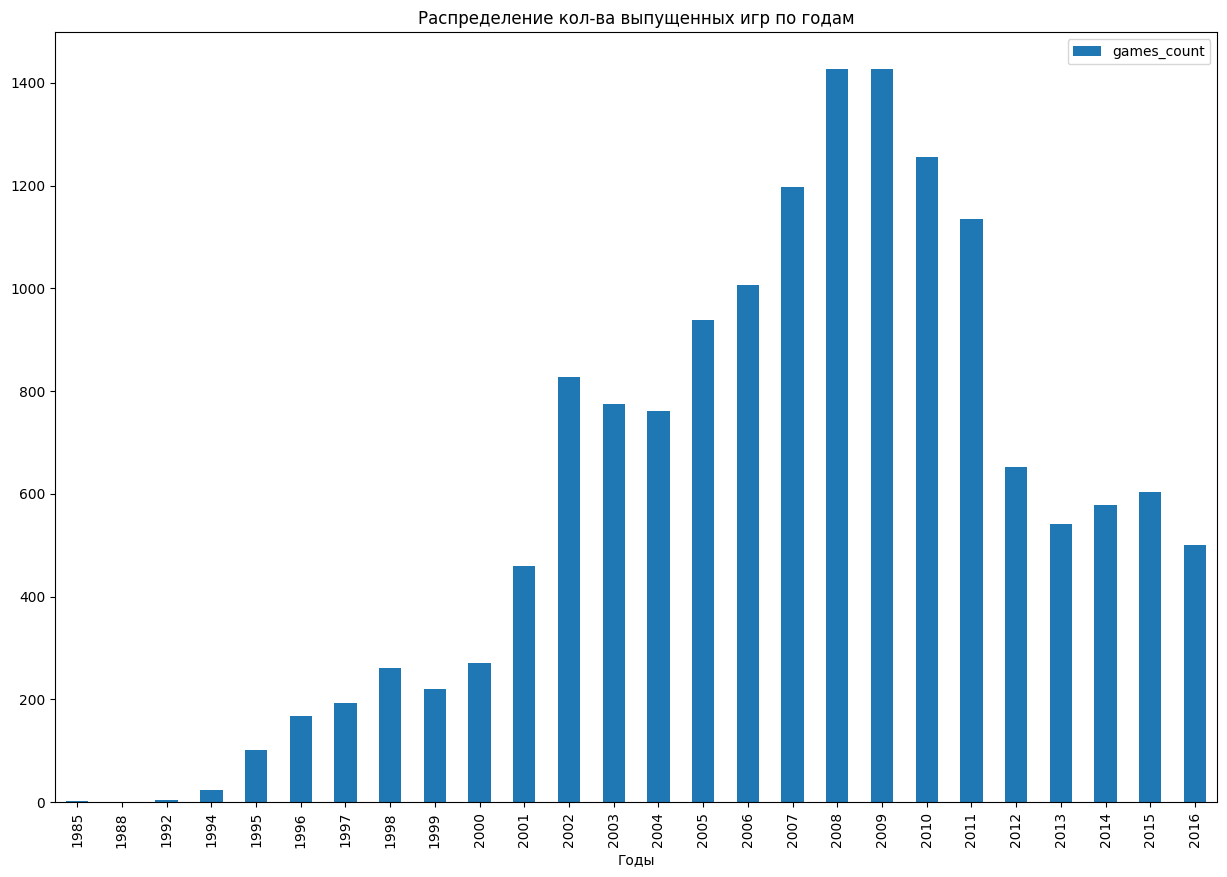

In [31]:
df_year_release.plot(kind = 'bar', y = 'games_count', figsize=(15, 10))
plt.title('Распределение кол-ва выпущенных игр по годам')
plt.xlabel('Годы')
plt.show()

По графику распределения выпуска игр видим: более менее значимый выпуск игр начался с 1995г, с 2001 по 2008 года наблюдается резкий рост выпуска игр, пик на уровне 1400 в 2008 и 2009 годах, затем резкое падение в 2012 г до уровня 650 игр. И затем с 2013 года стабильный выпуск на уровне 550-600 игр в год.

**Вывод:**
Для последующего анализа возьмем период с 2013 года.

### Оценка продаж игр различных платформ: в целом и в динамике

Возьмем данные продаж различных платформ по годам и рассмотрим динамику продаж за весь период и за актуальный для построения прогноза на 2017г период с 2013 года. Рассмотрим также цикл жизни различных платформ и оценим динамику продаж наиболее продаваемых платформ. Таким образом, нам удастся построить наиболее точный прогноз на 2017год.

In [32]:
df_platform_year_sales = df.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum')

display(df_platform_year_sales)

platform,3ds,dc,ds,gba,gc,pc,ps,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,
1985,NaN,NaN,0.02,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,3.30,NaN,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,5.16,NaN,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_platform_year_sales_from2013 = df_platform_year_sales.query('year_of_release >= 2013')
display(df_platform_year_sales_from2013)

platform,3ds,dc,ds,gba,gc,pc,ps,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,
2013,56.57,NaN,1.54,NaN,NaN,12.38,NaN,NaN,113.25,25.99,3.14,10.42,8.59,21.65,88.58,NaN,18.96
2014,43.76,NaN,NaN,NaN,NaN,13.28,NaN,NaN,47.76,100.00,0.24,11.84,3.75,22.03,34.74,NaN,54.07
2015,27.78,NaN,NaN,NaN,NaN,8.52,NaN,NaN,16.82,118.90,0.12,6.18,1.14,16.35,11.96,NaN,60.14
2016,15.14,NaN,NaN,NaN,NaN,5.25,NaN,NaN,3.60,69.25,NaN,4.15,0.18,4.60,1.52,NaN,26.15


In [34]:
fig = px.box(
    pd.melt(df_platform_year_sales_from2013),
    x="platform",
    y="value",
    points="outliers",
    title = 'Диаграмма размаха продаж по платформам с 2013г',
    labels = {'platform':'Платформы', 'value':'Кол-во проданных копий, млн'}
)
fig.show()

**Вывод:**
Наиболее выделяются продажи платформ 3ds, ps3, ps4, x360, xone.

Для оценки динамики продаж различных платформ построим тепловую карту за весь период.

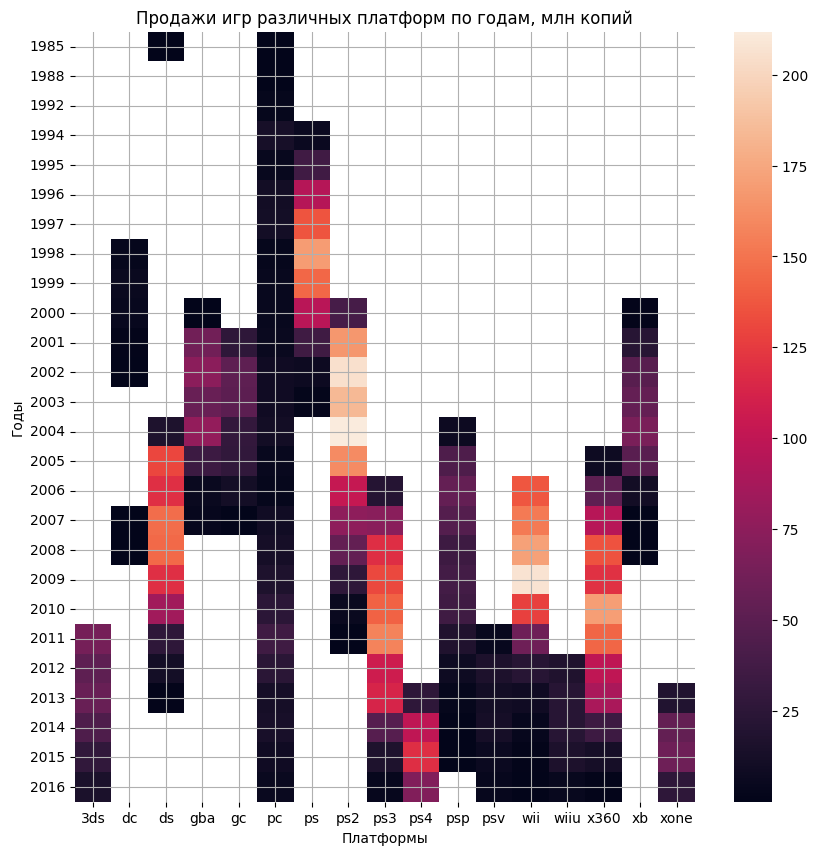

In [35]:
plt.figure(figsize=(10, 10))
sb.heatmap(df_platform_year_sales)
plt.title('Продажи игр различных платформ по годам, млн копий')
plt.xlabel('Платформы')
plt.ylabel('Годы')
plt.grid(True)
plt.show()

По таблице и тепловой карте с динамикой продаж игр разных платформ по годам можем разнести платформы по разным категориям:
* 1) те, продажи которых начаты и закончены в исследуемом периоде (уже несколько лет не продаются) (напр, dc - 1998-2002, ds - 2004-2013, gba и gc - 2001-2007, ps - 1994-2003, ps2 - 2000-2011, psp - 2004-2015, xb - 2000-2008)
* 2) те, продажи которых начаты и не окончены (напр, 3ds с 2011, pc - весь период с 1985, ps3 - с 2006, ps4 - с 2013, psv - с 2011, wii - с 2006, wiiu - с 2012, x360 - с 2005, xone - с 2013).

То есть в 2017 году стоит ожидать продаж игр на платформах 3ds (развитие dc -> ds), ps4 (развитие ps -> ps2 -> ps3, продажи которой значительно сократились) и pc (продажи за весь срок незначительны), psv (на смену psp, продажи которой закончены), wiiu (на смену wii, продажи которой значительно сократились), xone (развитие xb -> x360, продажи которой значительно сократились).
Жизненный цикл платформ (срок от появления до исчезновения) составляет примерно 10 лет.

Так же по тепловой карте можно отметить уровень спроса на различные платформы (кол-во проданных копий игр), например, pc имеет низкие продажи, но тем не менее не исчезает с рынка. Наиболее продаваемые ps, ps2, ds уже исчезли с рынка, ps3 и x360  - продажи значительно упали в последний год.

In [36]:
print('Рейтинг платформ по количеству продаж за весь период, млн копий:')
df_platform_sales = df.groupby(['platform']).agg({'total_sales':'sum'})
display(df_platform_sales.total_sales.sort_values(ascending = False))

Рейтинг платформ по количеству продаж за весь период, млн копий:


platform
ps2    1,233.56
x360     961.24
ps3      931.34
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
pc       255.76
xb       251.57
gc       196.73
xone     159.32
wiiu      82.19
psv       53.38
dc        14.69
Name: total_sales, dtype: float32

Построим ящик с усами по платформам с прогнозируемыми продажами: ps4; ps3 и x360; 3ds, pc, xone. Отдельно посмотрим на продажи некогда наиболее продаваемых ps, ps2, wii, ds.

In [37]:
platform_sales_future_big = df_platform_year_sales[['ps4', 'ps3', 'x360']]
platform_sales_future_little = df_platform_year_sales[['3ds', 'pc', 'xone']]
platform_sales_past = df_platform_year_sales[['ps', 'ps2', 'wii', 'ds']]

In [38]:
fig = px.box(
    pd.melt(platform_sales_future_big),
    x="platform",
    y="value",
    points="outliers",
    title = 'Диаграмма размаха продаж более перспективных платформ за весь период',
    labels = {'platform':'Платформы', 'value':'Кол-во проданных копий, млн'}
)
fig.show()

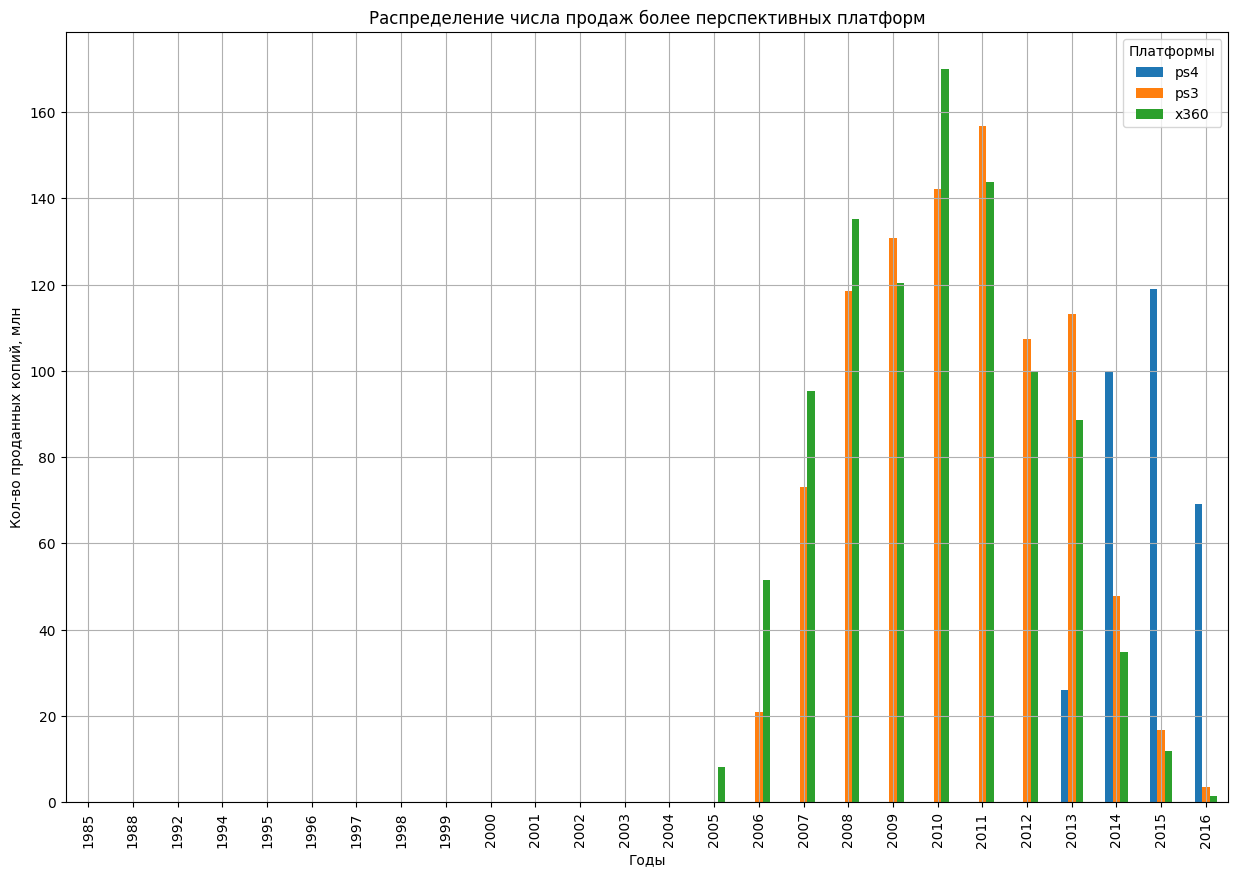

In [39]:
platform_sales_future_big.plot(kind = 'bar', grid = True, figsize=(15, 10))
plt.title('Распределение числа продаж более перспективных платформ')
plt.legend(title = 'Платформы')
plt.xlabel('Годы')
plt.ylabel('Кол-во проданных копий, млн')
plt.show()

In [40]:
fig = px.box(
    pd.melt(platform_sales_future_little),
    x="platform",
    y="value",
    points="outliers",
    title = 'Диаграмма размаха продаж менее перспективных платформ за весь период',
    labels = {'platform':'Платформы', 'value':'Кол-во проданных копий, млн'}
)
fig.show()

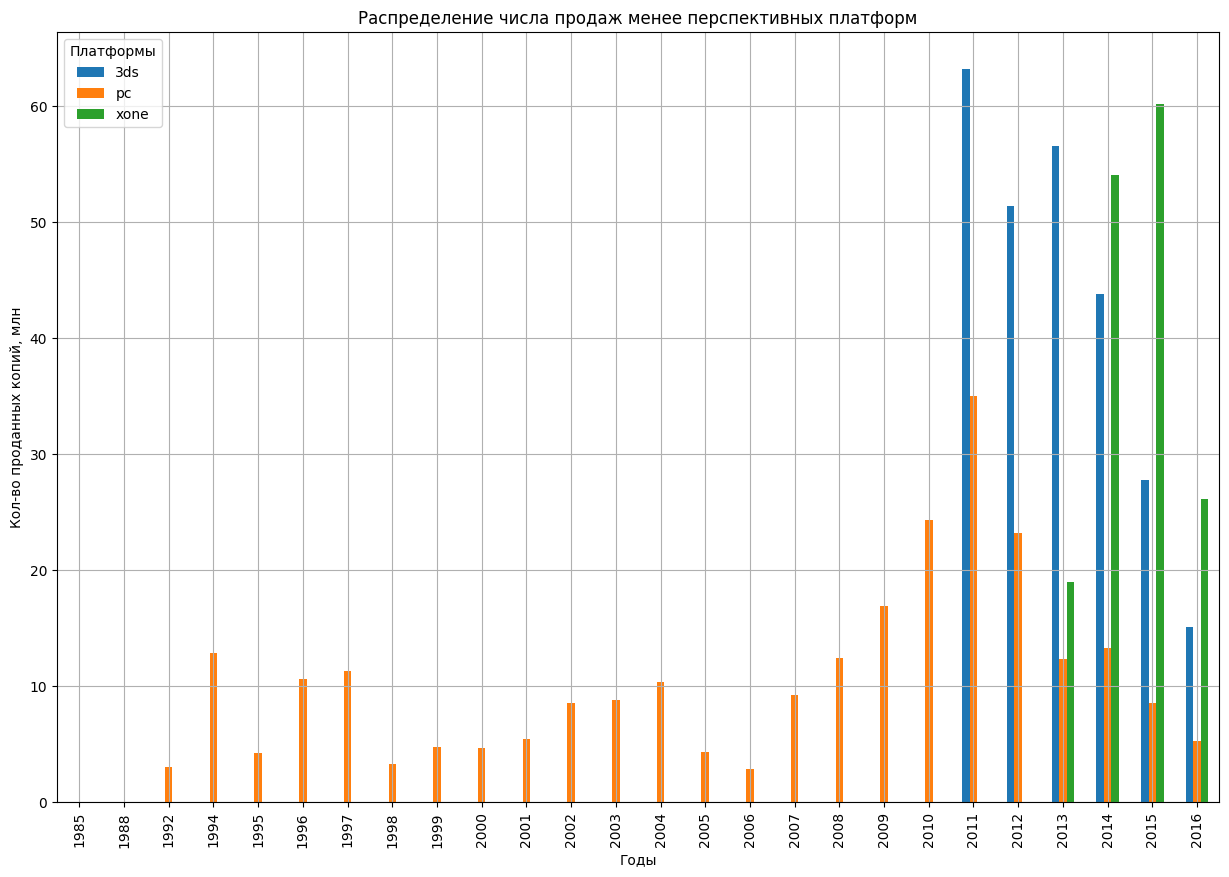

In [41]:
platform_sales_future_little.plot(kind = 'bar', grid = True, figsize=(15, 10))
plt.title('Распределение числа продаж менее перспективных платформ')
plt.legend(title = 'Платформы')
plt.xlabel('Годы')
plt.ylabel('Кол-во проданных копий, млн')
plt.show()

In [42]:
fig = px.box(
    pd.melt(platform_sales_past),
    x="platform",
    y="value",
    points="outliers",
    title = 'Диаграмма размаха продаж некогда наиболее продаваемых платформ за весь период',
    labels = {'platform':'Платформы', 'value':'Кол-во проданных копий, млн'}
)
fig.show()

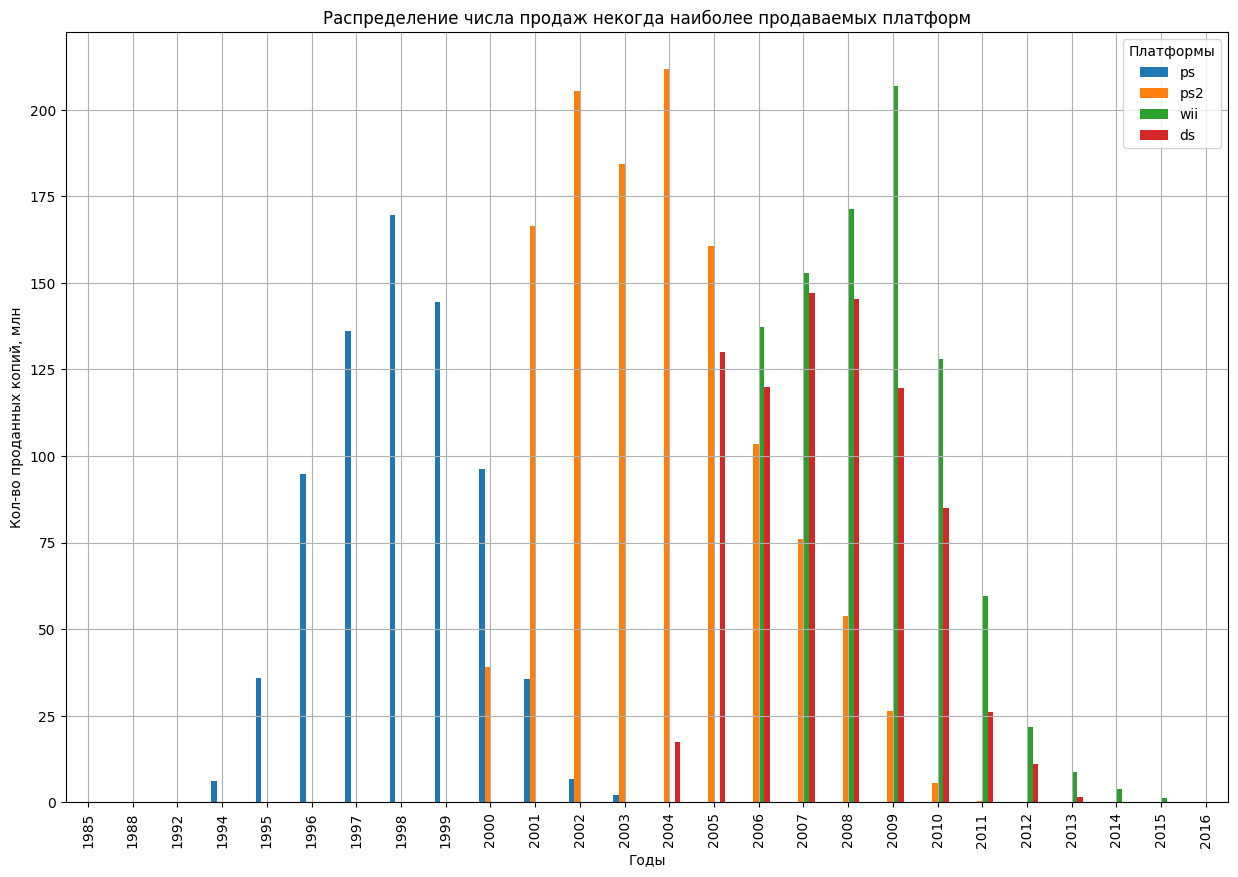

In [43]:
platform_sales_past.plot(kind = 'bar', grid = True, figsize=(15, 10))
plt.title('Распределение числа продаж некогда наиболее продаваемых платформ')
plt.legend(title = 'Платформы')
plt.xlabel('Годы')
plt.ylabel('Кол-во проданных копий, млн')
plt.show()

**Вывод:**
    
По данным диаграмм размаха и столбчатым диаграммам можно сделать вывод, что наиболее продаваемые платформы имеют смещение влево. То есть в начале выхода платформы продажи были значительны и постепенно снижались. Менее продаваемые платформы близки к нормальному распределению или имеют смещение вправо. Из перспективных платформ, выпущенных достаточно недавно, такое распределение имеют платформы ps4 и 3ds.   

Наиболее перспективной на 2017 год выглядит платформа ps4, по платформам ps3 и x360 продажи значительно упали, но еще идут, незначительные продажи скорей всего сохранятся также по платформам 3ds и pc, xone. Продажи wiiu и pcv вероятны, но очень несущественны, можно не принимать во внимание. Возможно, следует ожидать появления новой версии платформы 3ds (на смену более продаваемой ds).

### Оценка влияния отзывов пользователей и критиков на продажи платформ

Рассмотрим диаграммы рассеяния и коэффициенты корреляции между показателями оценок пользователей / критиков и общими продажами по платформам: ps2 (с максимальными суммарными продажами за весь период), ps4 (наиболее перспективной на 2017г), а также ps3, x360, 3ds и xone (популярными за период с 2013 года).

Диаграммы рассеяния и таблица коэффицциентов корреляции платформы ps2


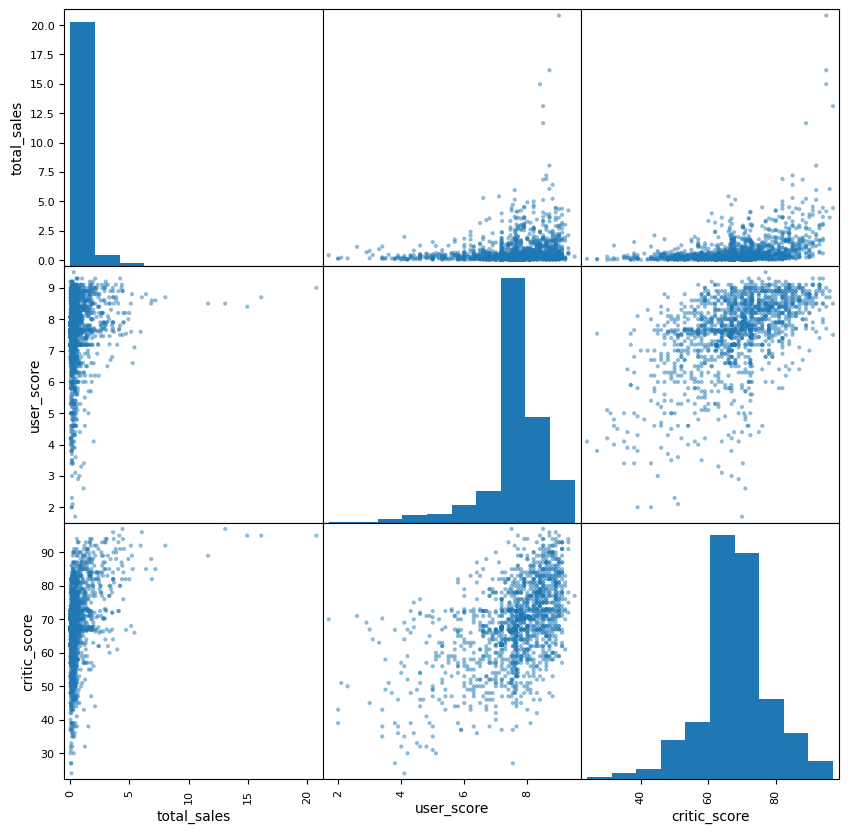

,total_sales,user_score,critic_score
total_sales,1.00,0.17,0.37
user_score,0.17,1.00,0.52
critic_score,0.37,0.52,1.00


In [44]:
#platforms = ['ps2', 'ps4', 'ps3', 'x360', '3ds', 'xone']
print('Диаграммы рассеяния и таблица коэффицциентов корреляции платформы ps2')
df_scores_platform = df[['platform', 'total_sales', 'user_score', 'critic_score']].query('platform == "ps2"')
pd.plotting.scatter_matrix(df_scores_platform, figsize=(10, 10))
plt.show()
display(df_scores_platform.corr())

По таблице и диаграмме видим существенную положительную зависимость между оценками пользователей и критиков (коэффициент корреляции 0,52). Что касается влияния оценок на общие продажи, то здесь зависимость не ярко выражена: оценка критиков оказывает более существенное влияние на общие продажи, чем оценка пользователей (коэффициент корреляции 0,37 у критиков в сравнение с коэффициентом корреляции пользователей 0,17 - зависимости практически нет). Это касается продаж платформы ps2.

Рассмотрим другие перспективные и популярные платформы

Матрица диаграмм рассеяния по платформе ps4


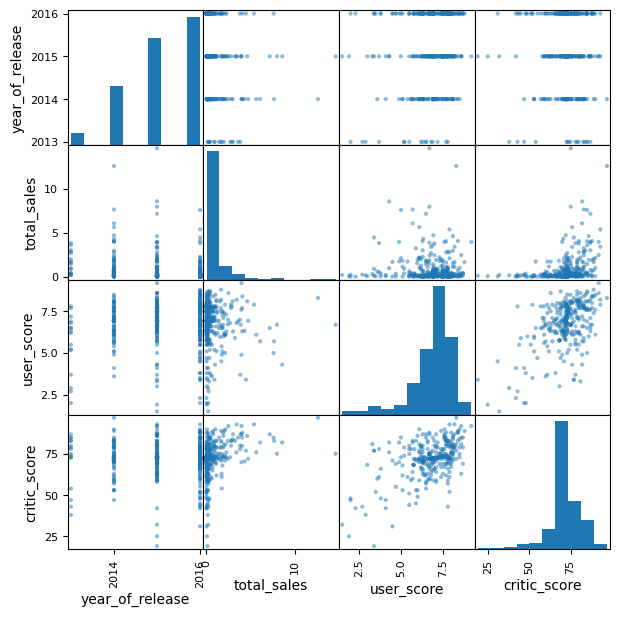

Таблица коэффициентов корреляции Пирсона для платформы ps4


,year_of_release,total_sales,user_score,critic_score
year_of_release,1.00,-0.24,0.13,-0.02
total_sales,-0.24,1.00,-0.05,0.34
user_score,0.13,-0.05,1.00,0.54
critic_score,-0.02,0.34,0.54,1.00


------------------------------------------------
Матрица диаграмм рассеяния по платформе ps3


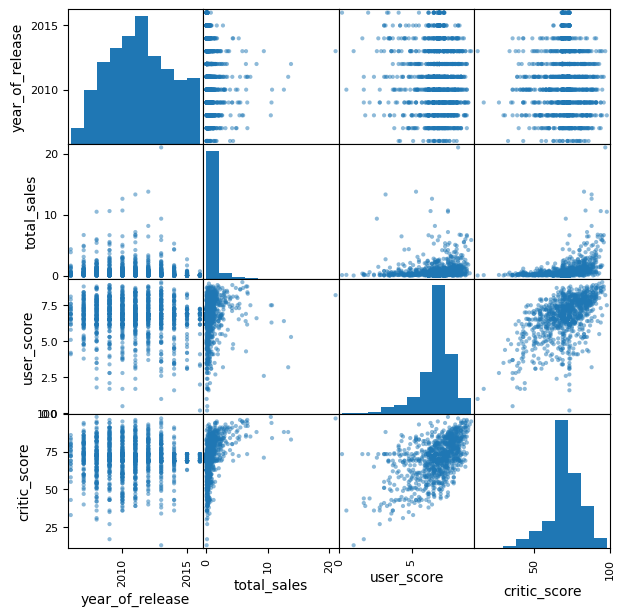

Таблица коэффициентов корреляции Пирсона для платформы ps3


,year_of_release,total_sales,user_score,critic_score
year_of_release,1.00,-0.10,-0.07,-0.01
total_sales,-0.10,1.00,0.12,0.40
user_score,-0.07,0.12,1.00,0.54
critic_score,-0.01,0.40,0.54,1.00


------------------------------------------------
Матрица диаграмм рассеяния по платформе x360


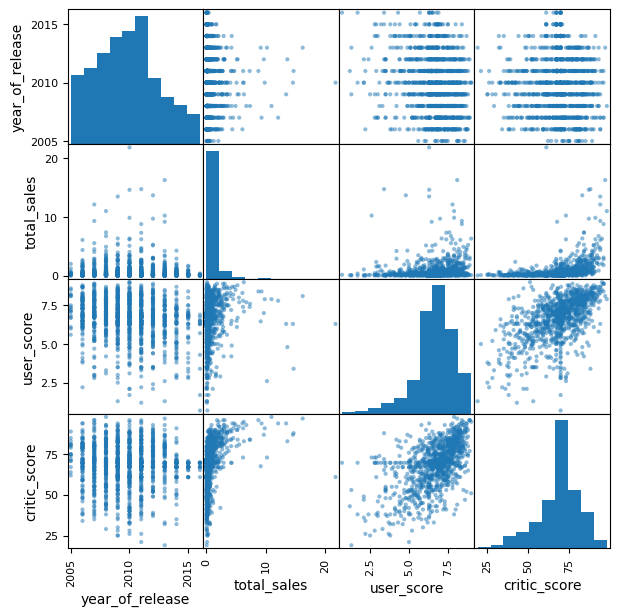

Таблица коэффициентов корреляции Пирсона для платформы x360


,year_of_release,total_sales,user_score,critic_score
year_of_release,1.00,0.00,-0.21,-0.02
total_sales,0.00,1.00,0.12,0.38
user_score,-0.21,0.12,1.00,0.57
critic_score,-0.02,0.38,0.57,1.00


------------------------------------------------
Матрица диаграмм рассеяния по платформе 3ds


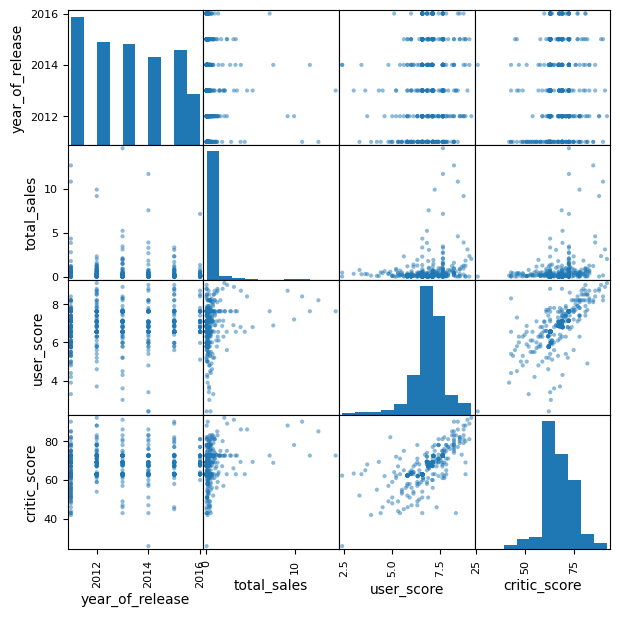

Таблица коэффициентов корреляции Пирсона для платформы 3ds


,year_of_release,total_sales,user_score,critic_score
year_of_release,1.00,-0.05,0.13,0.08
total_sales,-0.05,1.00,0.20,0.27
user_score,0.13,0.20,1.00,0.71
critic_score,0.08,0.27,0.71,1.00


------------------------------------------------
Матрица диаграмм рассеяния по платформе xone


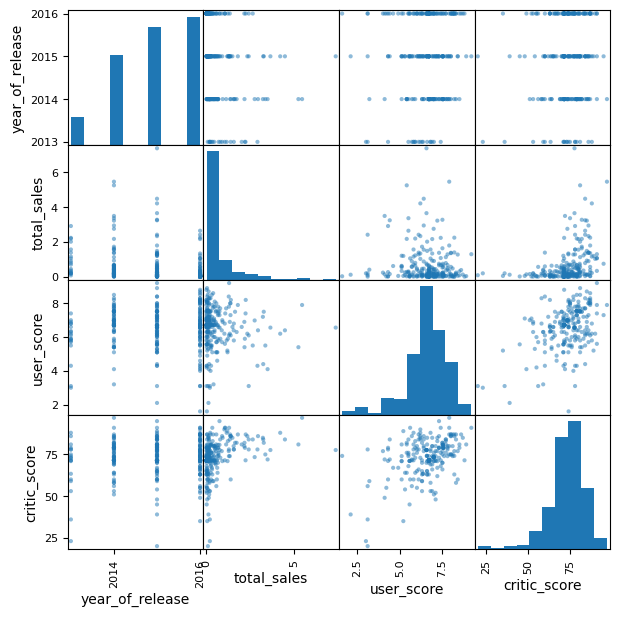

Таблица коэффициентов корреляции Пирсона для платформы xone


,year_of_release,total_sales,user_score,critic_score
year_of_release,1.00,-0.24,0.06,0.07
total_sales,-0.24,1.00,-0.07,0.35
user_score,0.06,-0.07,1.00,0.44
critic_score,0.07,0.35,0.44,1.00


------------------------------------------------


In [45]:
platforms = ['ps4', 'ps3', 'x360', '3ds', 'xone']
df_scores_platform = df[['platform','year_of_release', 'total_sales', 'user_score', 'critic_score']]
df_scores_platform.reset_index(inplace = True, drop = True)

for i in platforms:
    print('Матрица диаграмм рассеяния по платформе', i)
    df_platform = df_scores_platform.query('platform == @i')
    df_platform.reset_index(inplace = True, drop = True)
    pd.plotting.scatter_matrix(df_platform, figsize=(7, 7))
    plt.show()
    print('Таблица коэффициентов корреляции Пирсона для платформы', i)
    df_corr = df_platform[['year_of_release', 'total_sales', 'user_score', 'critic_score']]
    display(df_platform.corr())
    print('------------------------------------------------')

**Вывод:**

На общие продажи более существенное влияние оказывают оценки критиков, нежели оценки пользователей, но все-таки в незначительной степени. Оценки пользователей влияния на продажи не оказывают. Единственное исключение составляет платформа 3ds, где влияние оценок пользователей и критиков практически одинаково сказывается на общие продажи по платформе (коэффициент корреляции Пирсона 0,2 и 0,27 соответственно).

### Оценка популярности жанров

Для оценки популярности жанров выведем рейтинг по продажам за весь период.

In [46]:
print('Рейтинг жанров по количеству продаж за весь период, млн копий:')
df_genre_sales = df.groupby(['genre']).agg({'total_sales':'sum'})
display(df_genre_sales.total_sales.sort_values(ascending = False))

Рейтинг жанров по количеству продаж за весь период, млн копий:


genre
action         1,609.40
sports         1,214.56
shooter          952.15
role-playing     779.25
misc             752.24
racing           650.61
platform         543.14
fighting         370.46
simulation       366.93
adventure        204.90
puzzle           146.97
strategy         145.07
Name: total_sales, dtype: float32

In [47]:
df_genre_year_sales = df.pivot_table(index = 'year_of_release', columns = 'genre', values = 'total_sales', aggfunc = 'sum')
display(df_genre_year_sales)

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
year_of_release,,,,,,,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN
1992,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,0.02,2.14,NaN,0.08
1994,NaN,2.87,1.39,2.40,NaN,NaN,0.85,0.19,7.15,0.75,0.96,2.34
1995,2.82,0.26,6.44,4.33,4.29,0.35,4.46,3.22,1.96,3.33,3.66,5.06
1996,17.69,2.16,14.31,9.74,8.61,2.65,12.71,6.31,5.69,8.16,13.01,4.24
1997,24.81,4.32,8.07,2.75,14.58,2.77,24.27,19.56,8.61,7.96,23.61,6.13
1998,30.31,5.45,26.37,8.95,23.22,4.28,20.73,10.39,8.00,3.06,29.63,5.66
1999,22.38,7.31,4.50,8.70,7.58,1.05,29.27,23.57,8.73,6.70,23.54,11.10


Для оценки динамики продаж различных жанров построим тепловую карту за весь период.

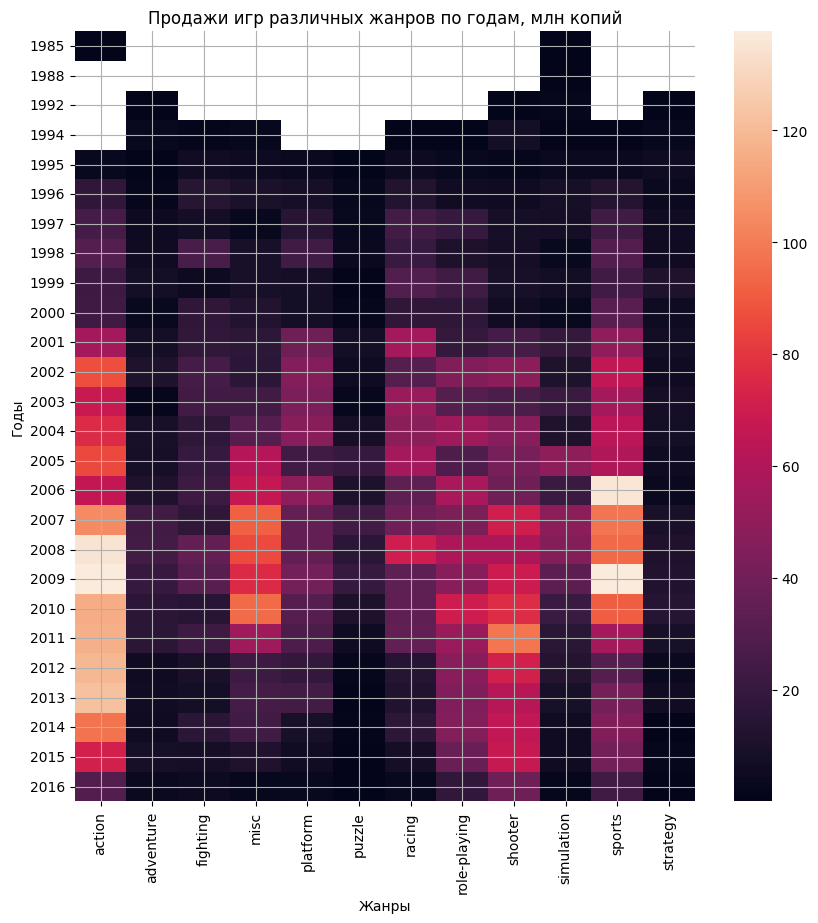

In [48]:
plt.figure(figsize=(10, 10))
sb.heatmap(df_genre_year_sales)
plt.title('Продажи игр различных жанров по годам, млн копий')
plt.ylabel('Годы')
plt.xlabel('Жанры')
plt.grid(True)
plt.show()

In [49]:
df_genre_year_sales[["action", "shooter", "role-playing", "sports"]].describe().T

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
action,23.00,69.97,44.10,0.02,27.46,72.02,110.07,137.69
shooter,24.00,39.67,29.30,0.02,8.46,39.88,65.79,98.18
role-playing,23.00,33.88,19.72,0.19,18.54,37.64,47.11,69.65
sports,23.00,52.81,37.35,0.96,26.62,45.15,64.42,137.37


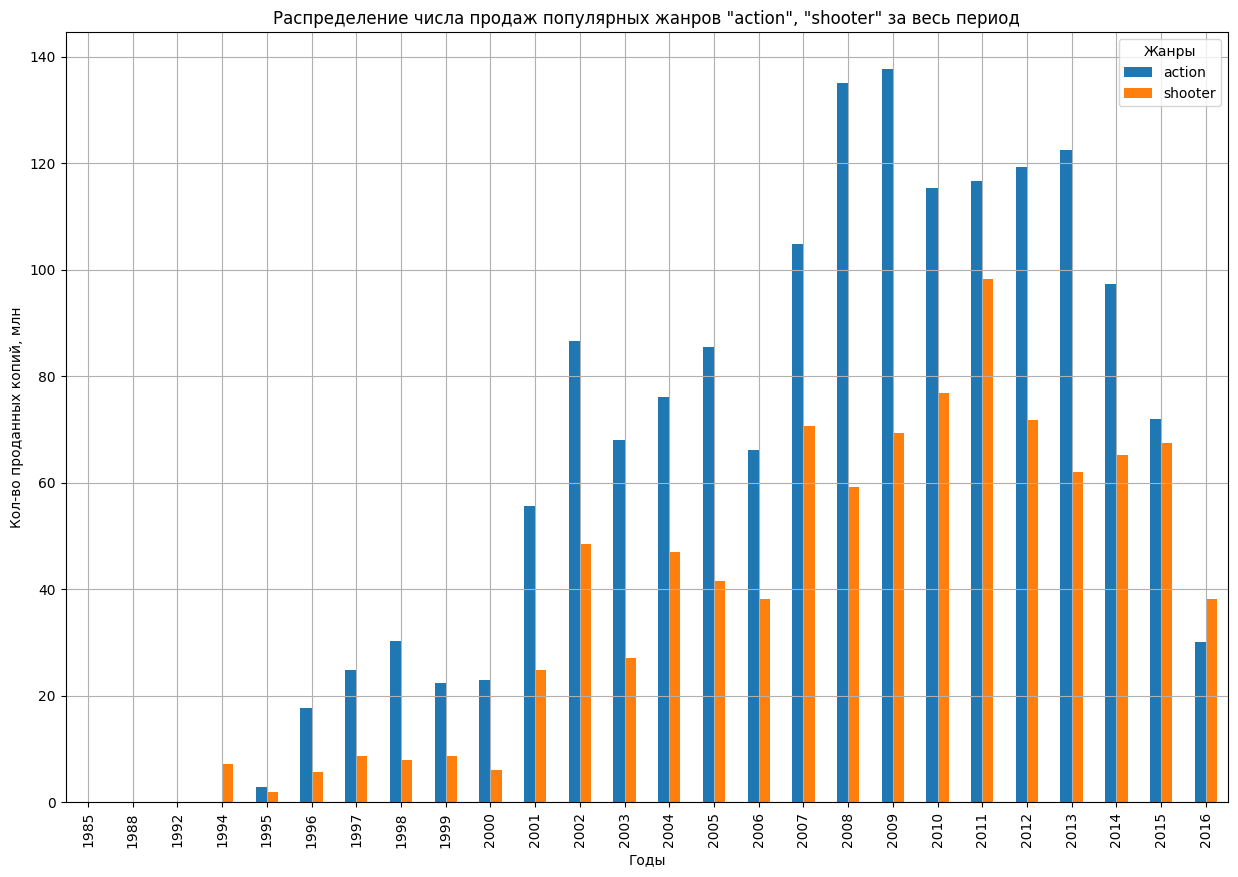

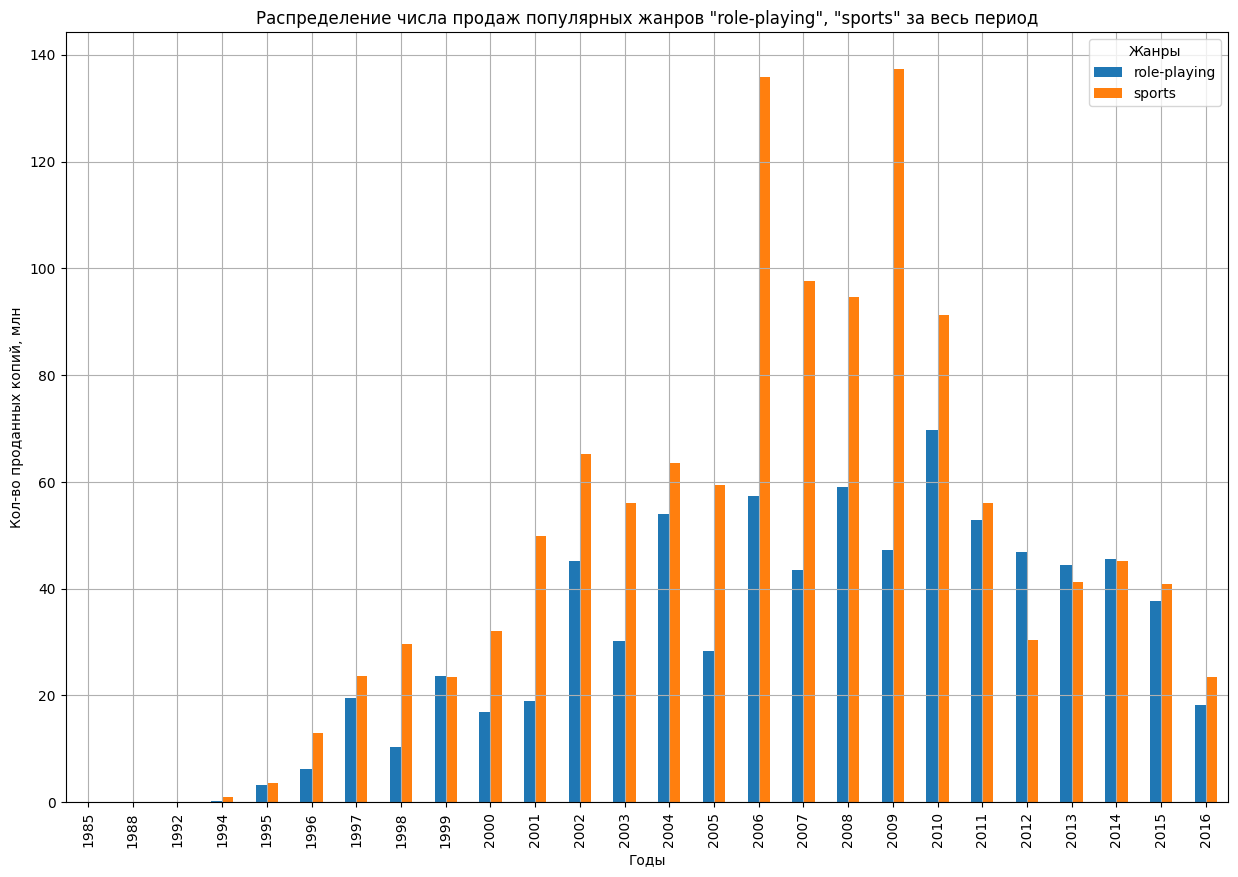

In [50]:
df_genre_year_sales[["action", "shooter"]].plot(kind = 'bar', grid = True, figsize=(15, 10))
plt.title('Распределение числа продаж популярных жанров "action", "shooter" за весь период')
plt.legend(title = 'Жанры')
plt.xlabel('Годы')
plt.ylabel('Кол-во проданных копий, млн')
plt.show()
df_genre_year_sales[["role-playing", "sports"]].plot(kind = 'bar', grid = True, figsize=(15, 10))
plt.title('Распределение числа продаж популярных жанров "role-playing", "sports" за весь период')
plt.legend(title = 'Жанры')
plt.xlabel('Годы')
plt.ylabel('Кол-во проданных копий, млн')
plt.show()

**Вывод:**

Явный лидер продаж за весь период - жанр action. Второй по популярности жанр shooter (см тепловую карту). Некогда популярные жанры misc и racing сейчас уступают в продажах другим жанрам. Сильные позиции еще держат role-playing и sports, хотя их продажи в последние годы сократились.

Рассмотрим теперь актуальный период с 2013г.

In [51]:
df.query('year_of_release >= 2013').groupby(['genre']).agg({'total_sales':'sum'}).total_sales.sort_values(ascending = False)

genre
action         321.87
shooter        232.98
sports         150.65
role-playing   145.89
misc            62.82
platform        42.63
racing          39.89
fighting        35.31
adventure       23.64
simulation      21.71
strategy         9.73
puzzle           3.17
Name: total_sales, dtype: float32

С актуалаьного периода 2013 года наиболее продаваемые жанры: action, shooter, role-playing, sports.

In [52]:
df_genre_sales_from2013 = df_genre_year_sales.query('year_of_release >= 2013')
display(df_genre_sales_from2013)

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
year_of_release,,,,,,,,,,,,
2013,122.51,6.09,7.09,25.27,24.54,0.96,12.37,44.45,62.04,8.63,41.17,5.95
2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.57,45.15,0.93
2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.63,40.84,1.81
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.88,23.49,1.04


In [53]:
df_genre_sales_from2013[["action", "shooter", "role-playing", "sports"]].describe().T

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
action,4.00,80.47,39.39,30.11,61.54,84.62,103.55,122.51
shooter,4.00,58.25,13.54,38.22,56.09,63.62,65.78,67.51
role-playing,4.00,36.47,12.69,18.18,32.77,41.05,44.74,45.62
sports,4.00,37.66,9.65,23.49,36.50,41.00,42.16,45.15


In [54]:
fig = px.box(
    pd.melt(df_genre_sales_from2013[["action", "shooter", "role-playing", "sports"]]),
    x="genre",
    y="value",
    points="outliers",
    title = 'Диаграмма размаха продаж жанров с 2013г',
    labels = {'genre':'Жанры', 'value':'Кол-во проданных копий, млн'}
)
fig.show()

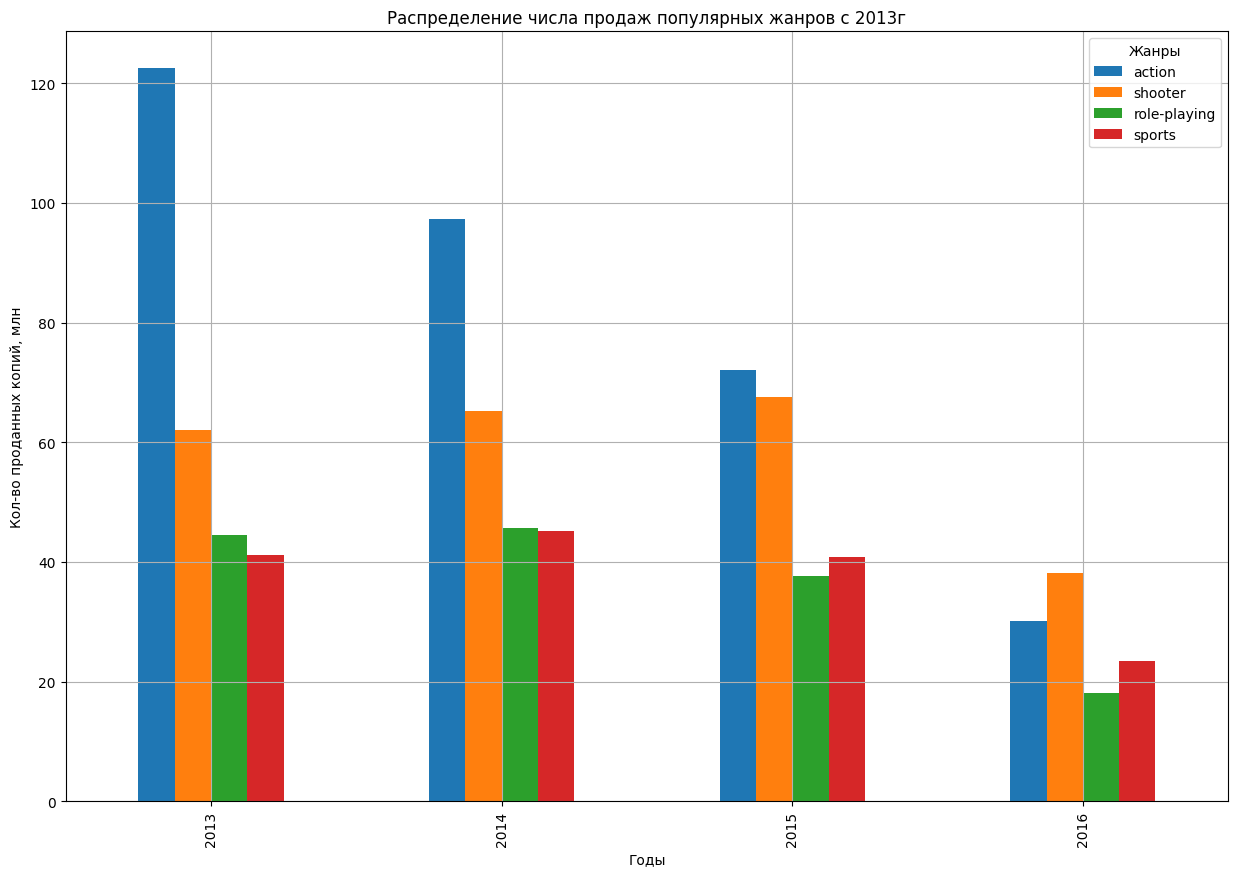

In [55]:
df_genre_sales_from2013[["action", "shooter", "role-playing", "sports"]].plot(kind = 'bar', grid = True, figsize=(15, 10))
plt.title('Распределение числа продаж популярных жанров с 2013г')
plt.legend(title = 'Жанры')
plt.xlabel('Годы')
plt.ylabel('Кол-во проданных копий, млн')
plt.show()

**Вывод:**

По актуальному периоду с 2013г имеем скошенность продаж жанров влево. Продажи жанра action значительно снижаются к концу периода, к 2016г. Таким образом, продажи жанров выравниваются. И жанр shooter выходит в лидеры с незначительным опережением action. Sports и role-playing также достаточно популярны.  

### Портрет пользователя каждого региона (платформы, жанры, рейтинги)

In [56]:
df_regions_sales_ratio = (
    df.query('year_of_release >= 2013')
    .groupby(['year_of_release'])
    .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum', 'total_sales':'sum'})
)
display(df_regions_sales_ratio)

print('Доля продаж в Северной Америке за период 2013-2016гг составляет: {:.0%}'
      .format(df_regions_sales_ratio.na_sales.sum() / df_regions_sales_ratio.total_sales.sum()))

print('Доля продаж в Европе за период 2013-2016гг составляет: {:.0%}'
      .format(df_regions_sales_ratio.eu_sales.sum() / df_regions_sales_ratio.total_sales.sum()))

print('Доля продаж в Японии за период 2013-2016гг составляет: {:.0%}'
      .format(df_regions_sales_ratio.jp_sales.sum() / df_regions_sales_ratio.total_sales.sum()))

print('Доля продаж в прочих регионах за период 2013-2016гг составляет: {:.0%}'
      .format(df_regions_sales_ratio.other_sales.sum() / df_regions_sales_ratio.total_sales.sum()))

,na_sales,eu_sales,jp_sales,other_sales,total_sales
year_of_release,,,,,
2013,153.62,121.52,47.60,38.33,361.07
2014,132.26,122.74,39.64,36.83,331.47
2015,106.86,96.72,34.02,30.31,267.91
2016,44.93,51.22,19.21,14.48,129.84


Доля продаж в Северной Америке за период 2013-2016гг составляет: 40%
Доля продаж в Европе за период 2013-2016гг составляет: 36%
Доля продаж в Японии за период 2013-2016гг составляет: 13%
Доля продаж в прочих регионах за период 2013-2016гг составляет: 11%


Составим портрет пользователя на основе данных за последние годы с 2013г.

Выберем данные по продажам жанров в различных регионах.

In [57]:
df_regions_genre = (
    df.query('year_of_release >= 2013')
    .groupby(['genre'])
    .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum', 'total_sales':'sum'})
    .sort_values(by = 'total_sales', ascending = False)
    .head(8)
)
display(df_regions_genre)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
genre,,,,,
action,126.05,118.13,40.49,37.20,321.87
shooter,109.74,87.86,6.61,28.77,232.98
sports,65.27,60.52,5.41,19.45,150.65
role-playing,46.40,36.97,51.04,11.48,145.89
misc,27.49,20.04,9.20,6.09,62.82
platform,18.14,15.58,4.79,4.12,42.63
racing,12.96,20.19,2.30,4.44,39.89
fighting,15.55,8.55,7.65,3.56,35.31


Рассчитаем доли 5 наиболее популярных жанров в каждом регионе.

In [58]:
df_regions_genre['ratio_na'] = (
    (df_regions_genre.na_sales >= df_regions_genre.na_sales.sort_values(ascending = False).head().min())
    * df_regions_genre['na_sales'] / df_regions_genre.na_sales.sort_values(ascending = False).head().sum()
)

df_regions_genre['ratio_eu'] = (
    (df_regions_genre.eu_sales >= df_regions_genre.eu_sales.sort_values(ascending = False).head().min())
    * df_regions_genre['eu_sales'] / df_regions_genre.eu_sales.sort_values(ascending = False).head().sum()
)

df_regions_genre['ratio_jp'] = (
    (df_regions_genre.jp_sales >= df_regions_genre.jp_sales.sort_values(ascending = False).head().min())
    * df_regions_genre['jp_sales'] / df_regions_genre.jp_sales.sort_values(ascending = False).head().sum()
)

df_regions_genre['ratio_other'] = (
    (df_regions_genre.other_sales >= df_regions_genre.other_sales.sort_values(ascending = False).head().min())
    * df_regions_genre['other_sales'] / df_regions_genre.other_sales.sort_values(ascending = False).head().sum()
)

display(df_regions_genre)

,na_sales,eu_sales,jp_sales,other_sales,total_sales,ratio_na,ratio_eu,ratio_jp,ratio_other
genre,,,,,,,,,
action,126.05,118.13,40.49,37.20,321.87,0.34,0.36,0.35,0.36
shooter,109.74,87.86,6.61,28.77,232.98,0.29,0.27,0.06,0.28
sports,65.27,60.52,5.41,19.45,150.65,0.17,0.19,0.00,0.19
role-playing,46.40,36.97,51.04,11.48,145.89,0.12,0.11,0.44,0.11
misc,27.49,20.04,9.20,6.09,62.82,0.07,0.00,0.08,0.06
platform,18.14,15.58,4.79,4.12,42.63,0.00,0.00,0.00,0.00
racing,12.96,20.19,2.30,4.44,39.89,0.00,0.06,0.00,0.00
fighting,15.55,8.55,7.65,3.56,35.31,0.00,0.00,0.07,0.00


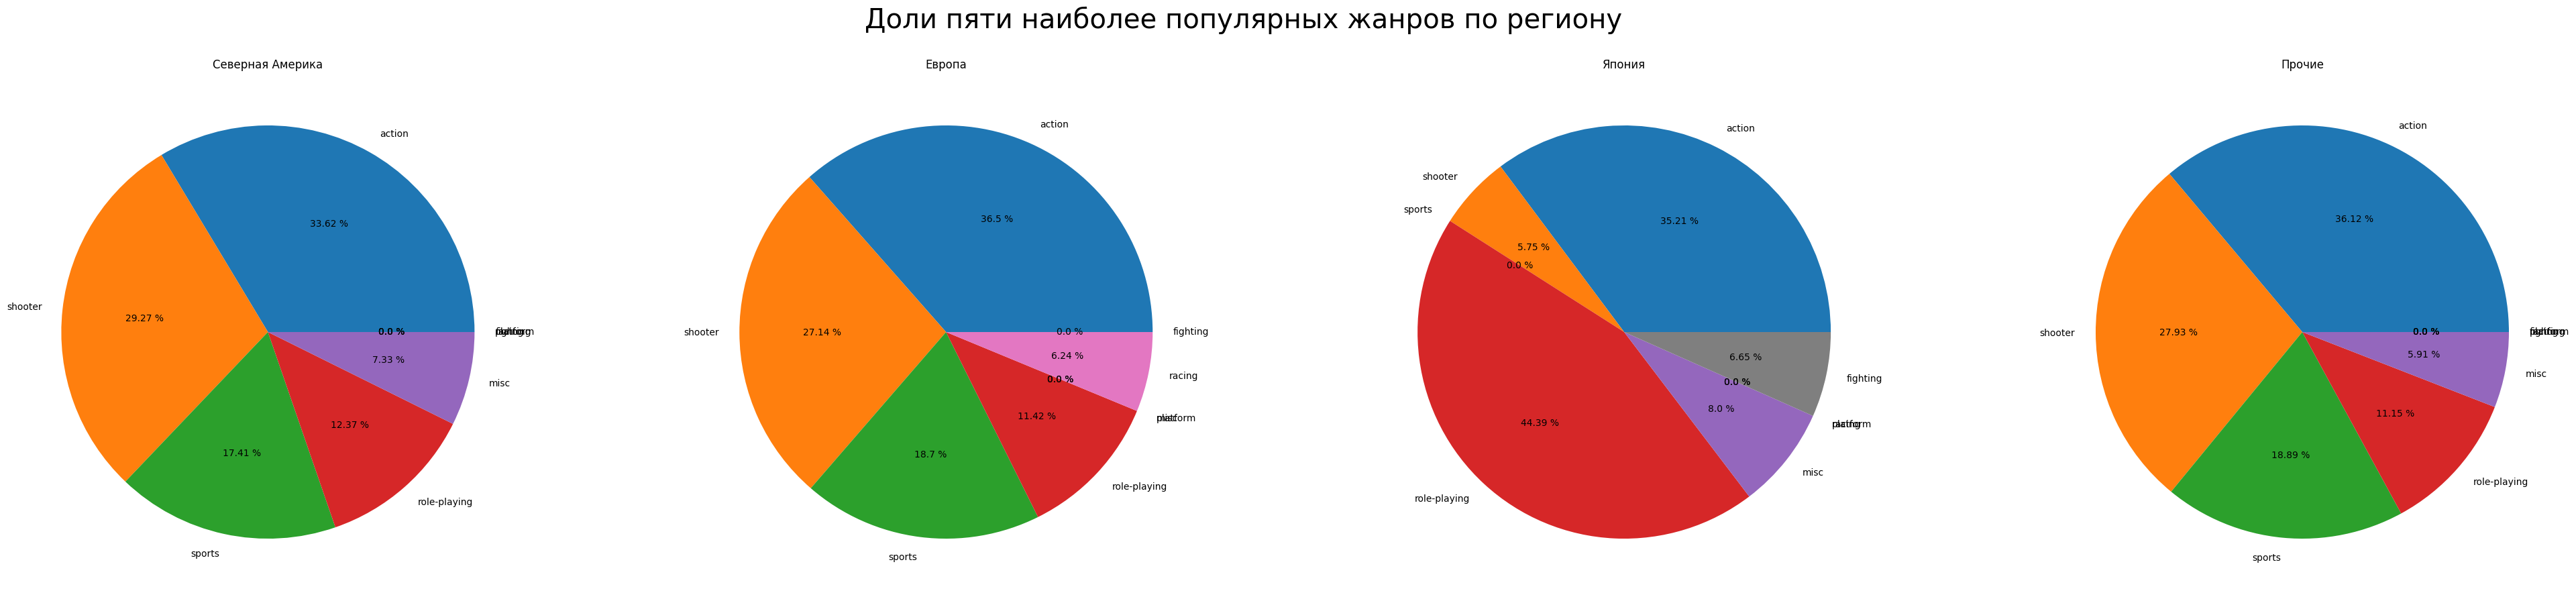

In [59]:
ratio_regions = ['ratio_na', 'ratio_eu', 'ratio_jp', 'ratio_other']
name_genre = df_regions_genre.index
name_regions = ['Северная Америка', 'Европа', 'Япония', 'Прочие']
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(50,10))
fig.suptitle('Доли пяти наиболее популярных жанров по региону', fontsize=29)

for i in range(4):

    axs[i].pie(df_regions_genre[ratio_regions[i]], autopct = lambda x:f"{round(x,2)} %", labels = name_genre)
    axs[i].set_title(name_regions[i])

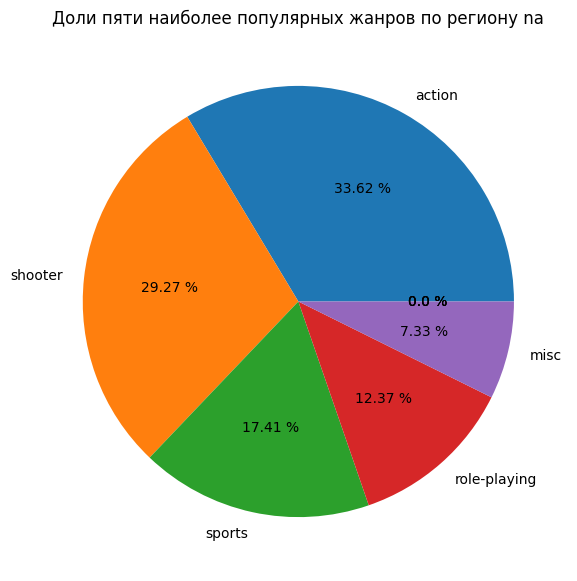

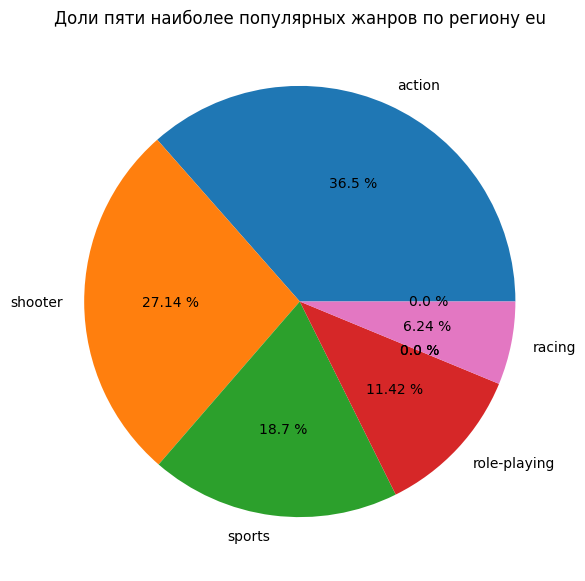

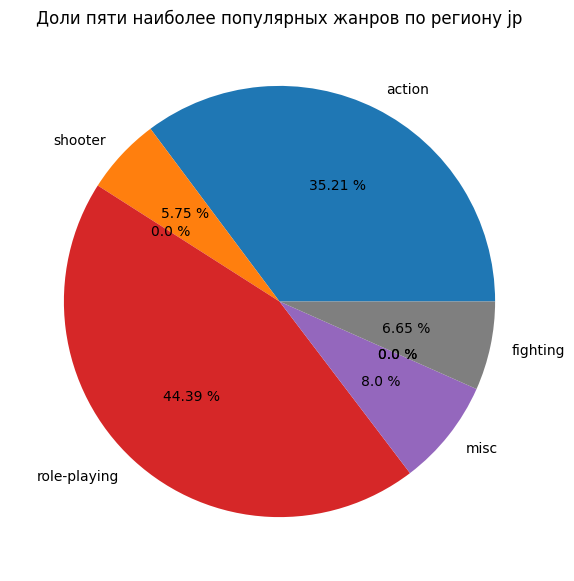

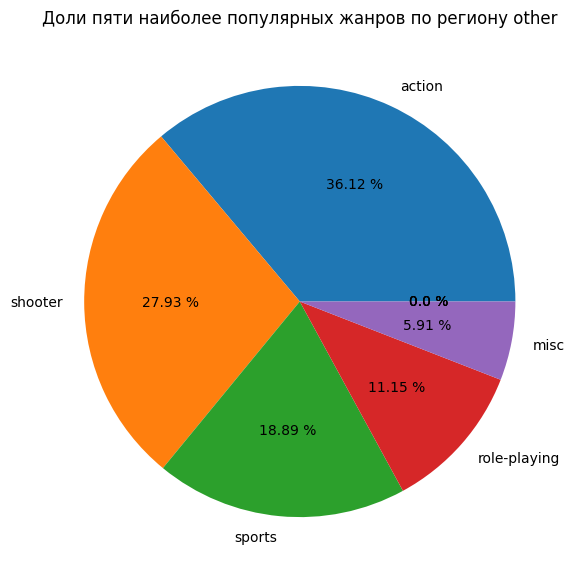

In [60]:
ratio_regions = ['ratio_na', 'ratio_eu', 'ratio_jp', 'ratio_other']
pattern = r"_([a-z0-9]+)"
for i in ratio_regions:
    title = 'Доли пяти наиболее популярных жанров по региону ' + str(re.findall(pattern, i)[0])
    plt.figure(figsize=(7, 7))
    df_regions_genre[i].plot(kind = 'pie', autopct = lambda x:f"{round(x,2)} %", title = title)
    plt.ylabel('')

**Вывод:**

Структура жанров в регионах Северной Америки, Европы и прочих совпадает. На первом месте action, за ним shooter (практически одинаковые позиции с action), sports и role-playing. Пятерку наиболее популярных жанров замыкает misc в Северной Америке и прочих регионах. В Европе пятерку замыкает racing.

Стурктура жанров в Японии принципиально отличается от других регионов. На первом месте role-playing (почти 50%), затем идет action (занимает также практически треть, как и в остальных регионах). Очень несущественные доли у misc, fighting и shooter (8% -> 6%).

Выберем данные по продажам платформ в различных регионах за актуальный период с 2013г.

In [61]:
df_regions_platform = (
    df.query('year_of_release >= 2013')
    .groupby(['platform'])
    .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum', 'total_sales':'sum'})
    .sort_values(by = 'total_sales', ascending = False)
    .head(8)
)
display(df_regions_platform)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
ps4,108.74,141.09,15.96,48.35,314.14
ps3,63.50,67.81,23.35,26.77,181.43
xone,93.12,51.59,0.34,14.27,159.32
3ds,38.20,30.96,67.81,6.28,143.25
x360,81.66,42.52,0.51,12.11,136.80
wiiu,29.21,19.85,10.88,4.69,64.63
pc,11.11,25.36,0.00,2.96,39.43
psv,5.00,6.07,18.28,3.24,32.59


Рассчитаем доли 5 наиболее популярных платформ в каждом регионе.

In [62]:
df_regions_platform['ratio_na'] = (
    (df_regions_platform.na_sales >= df_regions_platform.na_sales.sort_values(ascending = False).head().min())
    * df_regions_platform['na_sales'] / df_regions_platform.na_sales.sort_values(ascending = False).head().sum()
)

df_regions_platform['ratio_eu'] = (
    (df_regions_platform.eu_sales >= df_regions_platform.eu_sales.sort_values(ascending = False).head().min())
    * df_regions_platform['eu_sales'] / df_regions_platform.eu_sales.sort_values(ascending = False).head().sum()
)

df_regions_platform['ratio_jp'] = (
    (df_regions_platform.jp_sales >= df_regions_platform.jp_sales.sort_values(ascending = False).head().min())
    * df_regions_platform['jp_sales'] / df_regions_platform.jp_sales.sort_values(ascending = False).head().sum()
)

df_regions_platform['ratio_other'] = (
    (df_regions_platform.other_sales >= df_regions_platform.other_sales.sort_values(ascending = False).head().min())
    * df_regions_platform['other_sales'] / df_regions_platform.other_sales.sort_values(ascending = False).head().sum()
)

display(df_regions_platform)

,na_sales,eu_sales,jp_sales,other_sales,total_sales,ratio_na,ratio_eu,ratio_jp,ratio_other
platform,,,,,,,,,
ps4,108.74,141.09,15.96,48.35,314.14,0.28,0.42,0.12,0.45
ps3,63.50,67.81,23.35,26.77,181.43,0.16,0.20,0.17,0.25
xone,93.12,51.59,0.34,14.27,159.32,0.24,0.15,0.00,0.13
3ds,38.20,30.96,67.81,6.28,143.25,0.10,0.09,0.50,0.06
x360,81.66,42.52,0.51,12.11,136.80,0.21,0.13,0.00,0.11
wiiu,29.21,19.85,10.88,4.69,64.63,0.00,0.00,0.08,0.00
pc,11.11,25.36,0.00,2.96,39.43,0.00,0.00,0.00,0.00
psv,5.00,6.07,18.28,3.24,32.59,0.00,0.00,0.13,0.00


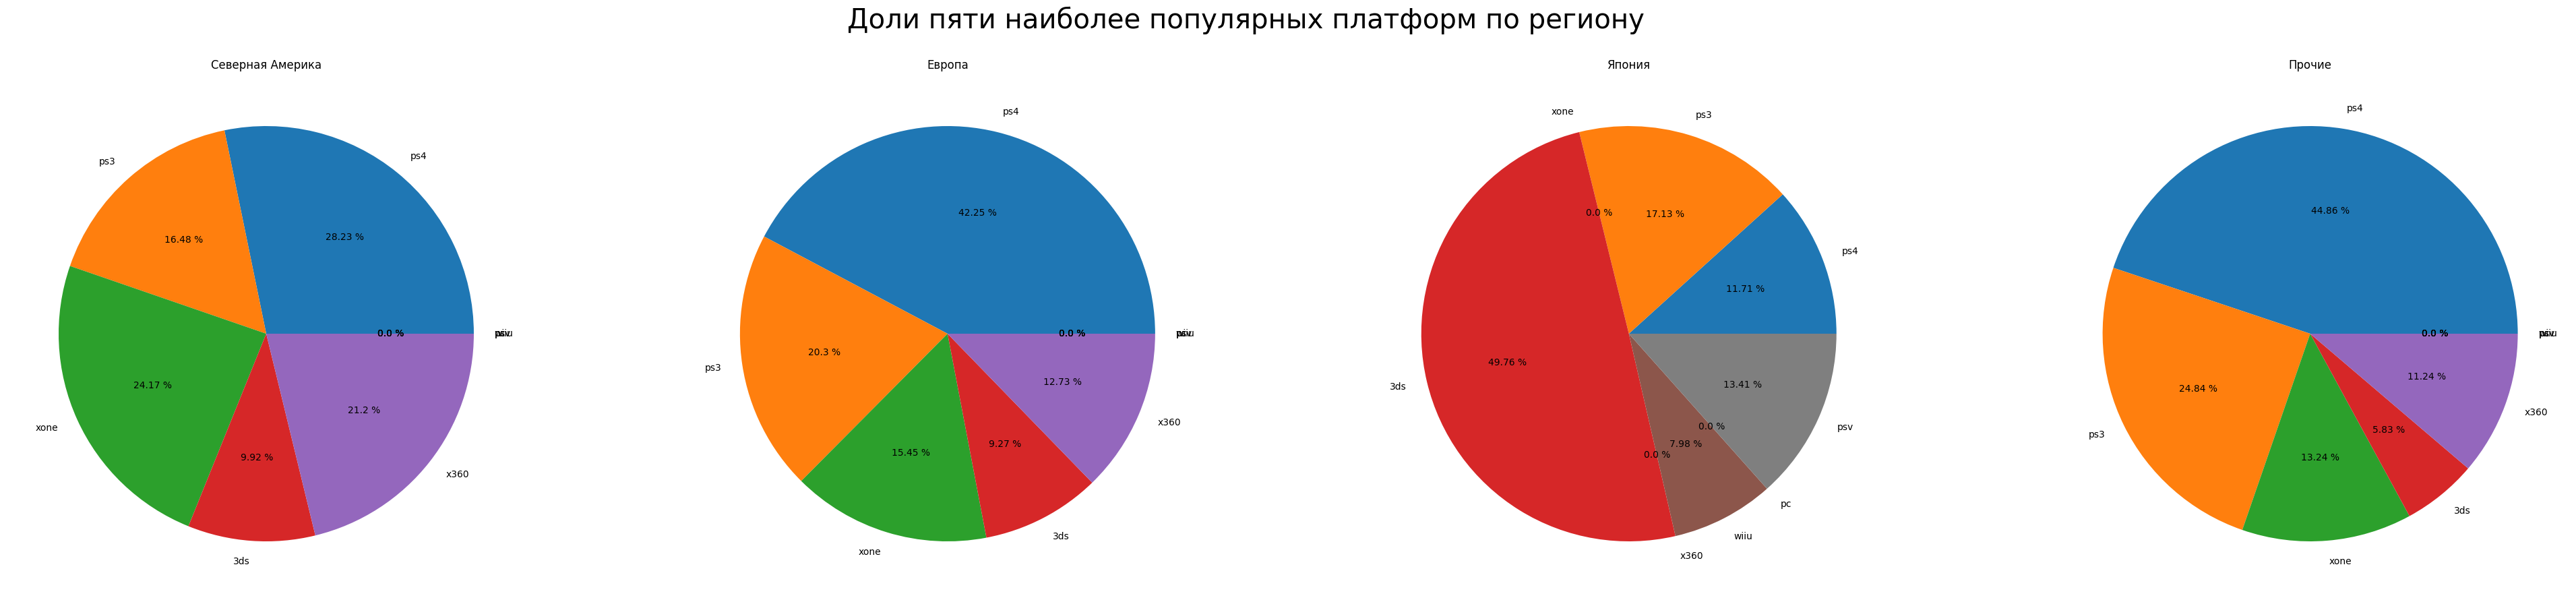

In [63]:
ratio_regions = ['ratio_na', 'ratio_eu', 'ratio_jp', 'ratio_other']
name_platform = df_regions_platform.index
name_regions = ['Северная Америка', 'Европа', 'Япония', 'Прочие']
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(50,10))
fig.suptitle('Доли пяти наиболее популярных платформ по региону', fontsize=29)

for i in range(4):

    axs[i].pie(df_regions_platform[ratio_regions[i]], autopct = lambda x:f"{round(x,2)} %", labels = name_platform)
    axs[i].set_title(name_regions[i])

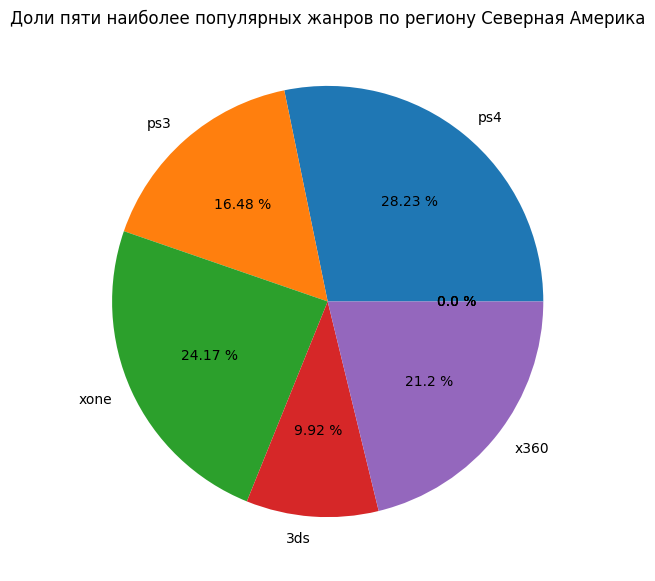

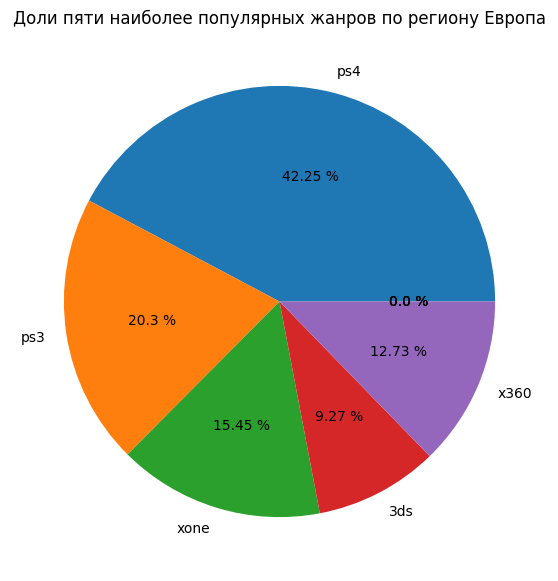

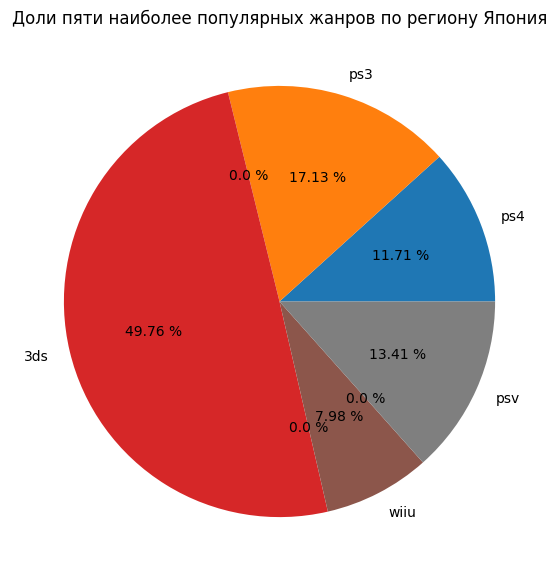

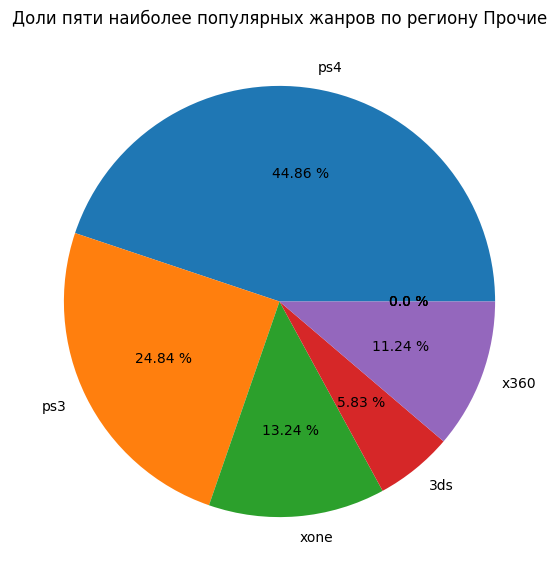

In [64]:
ratio_regions = ['ratio_na', 'ratio_eu', 'ratio_jp', 'ratio_other']
name_regions = ['Северная Америка', 'Европа', 'Япония', 'Прочие']
for i,y in zip(ratio_regions, name_regions):
    title = 'Доли пяти наиболее популярных жанров по региону ' + y
    plt.figure(figsize=(7, 7))
    df_regions_platform[i].plot(kind = 'pie', autopct = lambda x:f"{round(x,2)} %")
    plt.title(title)
    plt.ylabel('')

**Вывод:**

По популярности платформ похожи структуры пордаж в Европе и прочих регионах. Платформа ps4 лидирует, занимая долю в 5 наиболее популярных более 40%. На втором месте идет ps3 с долей 20-25%. Затем xone (ок 15%), x360 (ок 12%) и незначительная доля 3ds(5-9%).

В Северной Америке x360 с долей 21% входит в тройку лидеров наряду с ps4 (28%) и xone (24%). Доли продаж ps3 16% и 3ds почти 10%.

Япония, как и по структуре жанров, по структуре платформ так же значительно выбивается из общей картины. Последняя в рейтинге по полуряности в других регионах платформа 3ds в Японии занимает почти 50% продаж среди 5 наиболее популярных. Затем идет тройка ps3, psv и ps4 с долями 17%, 13% и 11%. Пятерку лидеров замыкает wiiu с долей 8%.

Выберем данные по продажам рейтингов по возрастным категориям в различных регионах.

In [65]:
df_regions_rating = (
    df.query('year_of_release >= 2013 ')
    .groupby(['rating'])
    .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum', 'total_sales':'sum'})
    .sort_values(by = 'total_sales', ascending = False)
)
display(df_regions_rating)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
rating,,,,,
M,165.21,145.32,14.11,47.04,371.68
unknown,89.41,78.91,84.74,23.46,276.52
E,79.02,83.33,15.14,22.59,200.08
T,49.79,41.95,20.59,14.29,126.62
E10+,54.24,42.69,5.89,12.57,115.39


Рассчитаем доли наиболее популярных рейтингов в каждом регионе.

In [66]:
df_regions_rating['ratio_na'] = (
    (df_regions_rating.na_sales >= df_regions_rating.na_sales.sort_values(ascending = False).head().min())
    * df_regions_rating['na_sales'] / df_regions_rating.na_sales.sort_values(ascending = False).head().sum()
)

df_regions_rating['ratio_eu'] = (
    (df_regions_rating.eu_sales >= df_regions_rating.eu_sales.sort_values(ascending = False).head().min())
    * df_regions_rating['eu_sales'] / df_regions_rating.eu_sales.sort_values(ascending = False).head().sum()
)

df_regions_rating['ratio_jp'] = (
    (df_regions_rating.jp_sales >= df_regions_rating.jp_sales.sort_values(ascending = False).head().min())
    * df_regions_rating['jp_sales'] / df_regions_rating.jp_sales.sort_values(ascending = False).head().sum()
)

df_regions_rating['ratio_other'] = (
    (df_regions_rating.other_sales >= df_regions_rating.other_sales.sort_values(ascending = False).head().min())
    * df_regions_rating['other_sales'] / df_regions_rating.other_sales.sort_values(ascending = False).head().sum()
)

display(df_regions_rating)

,na_sales,eu_sales,jp_sales,other_sales,total_sales,ratio_na,ratio_eu,ratio_jp,ratio_other
rating,,,,,,,,,
M,165.21,145.32,14.11,47.04,371.68,0.38,0.37,0.10,0.39
unknown,89.41,78.91,84.74,23.46,276.52,0.20,0.20,0.60,0.20
E,79.02,83.33,15.14,22.59,200.08,0.18,0.21,0.11,0.19
T,49.79,41.95,20.59,14.29,126.62,0.11,0.11,0.15,0.12
E10+,54.24,42.69,5.89,12.57,115.39,0.12,0.11,0.04,0.10


Так как в данных изначально присутствовало много пропусков по данному параметру и заполнение не представлялось возможным, почти 20% продаж не разнесены по соответствующим рейтингам. В Японии этот показатель составляет 60%.
Рассмотрим структуру рйетингов по регионам по имеющимся данным.

In [67]:
df_regions_rating = df_regions_rating[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].query('rating != "unknown"')

df_regions_rating['ratio_na'] = (
    (df_regions_rating.na_sales >= df_regions_rating.na_sales.sort_values(ascending = False).head().min())
    * df_regions_rating['na_sales'] / df_regions_rating.na_sales.sort_values(ascending = False).head().sum()
)

df_regions_rating['ratio_eu'] = (
    (df_regions_rating.eu_sales >= df_regions_rating.eu_sales.sort_values(ascending = False).head().min())
    * df_regions_rating['eu_sales'] / df_regions_rating.eu_sales.sort_values(ascending = False).head().sum()
)

df_regions_rating['ratio_jp'] = (
    (df_regions_rating.jp_sales >= df_regions_rating.jp_sales.sort_values(ascending = False).head().min())
    * df_regions_rating['jp_sales'] / df_regions_rating.jp_sales.sort_values(ascending = False).head().sum()
)

df_regions_rating['ratio_other'] = (
    (df_regions_rating.other_sales >= df_regions_rating.other_sales.sort_values(ascending = False).head().min())
    * df_regions_rating['other_sales'] / df_regions_rating.other_sales.sort_values(ascending = False).head().sum()
)

display(df_regions_rating)

,na_sales,eu_sales,jp_sales,other_sales,ratio_na,ratio_eu,ratio_jp,ratio_other
rating,,,,,,,,
M,165.21,145.32,14.11,47.04,0.47,0.46,0.25,0.49
E,79.02,83.33,15.14,22.59,0.23,0.27,0.27,0.23
T,49.79,41.95,20.59,14.29,0.14,0.13,0.37,0.15
E10+,54.24,42.69,5.89,12.57,0.16,0.14,0.11,0.13


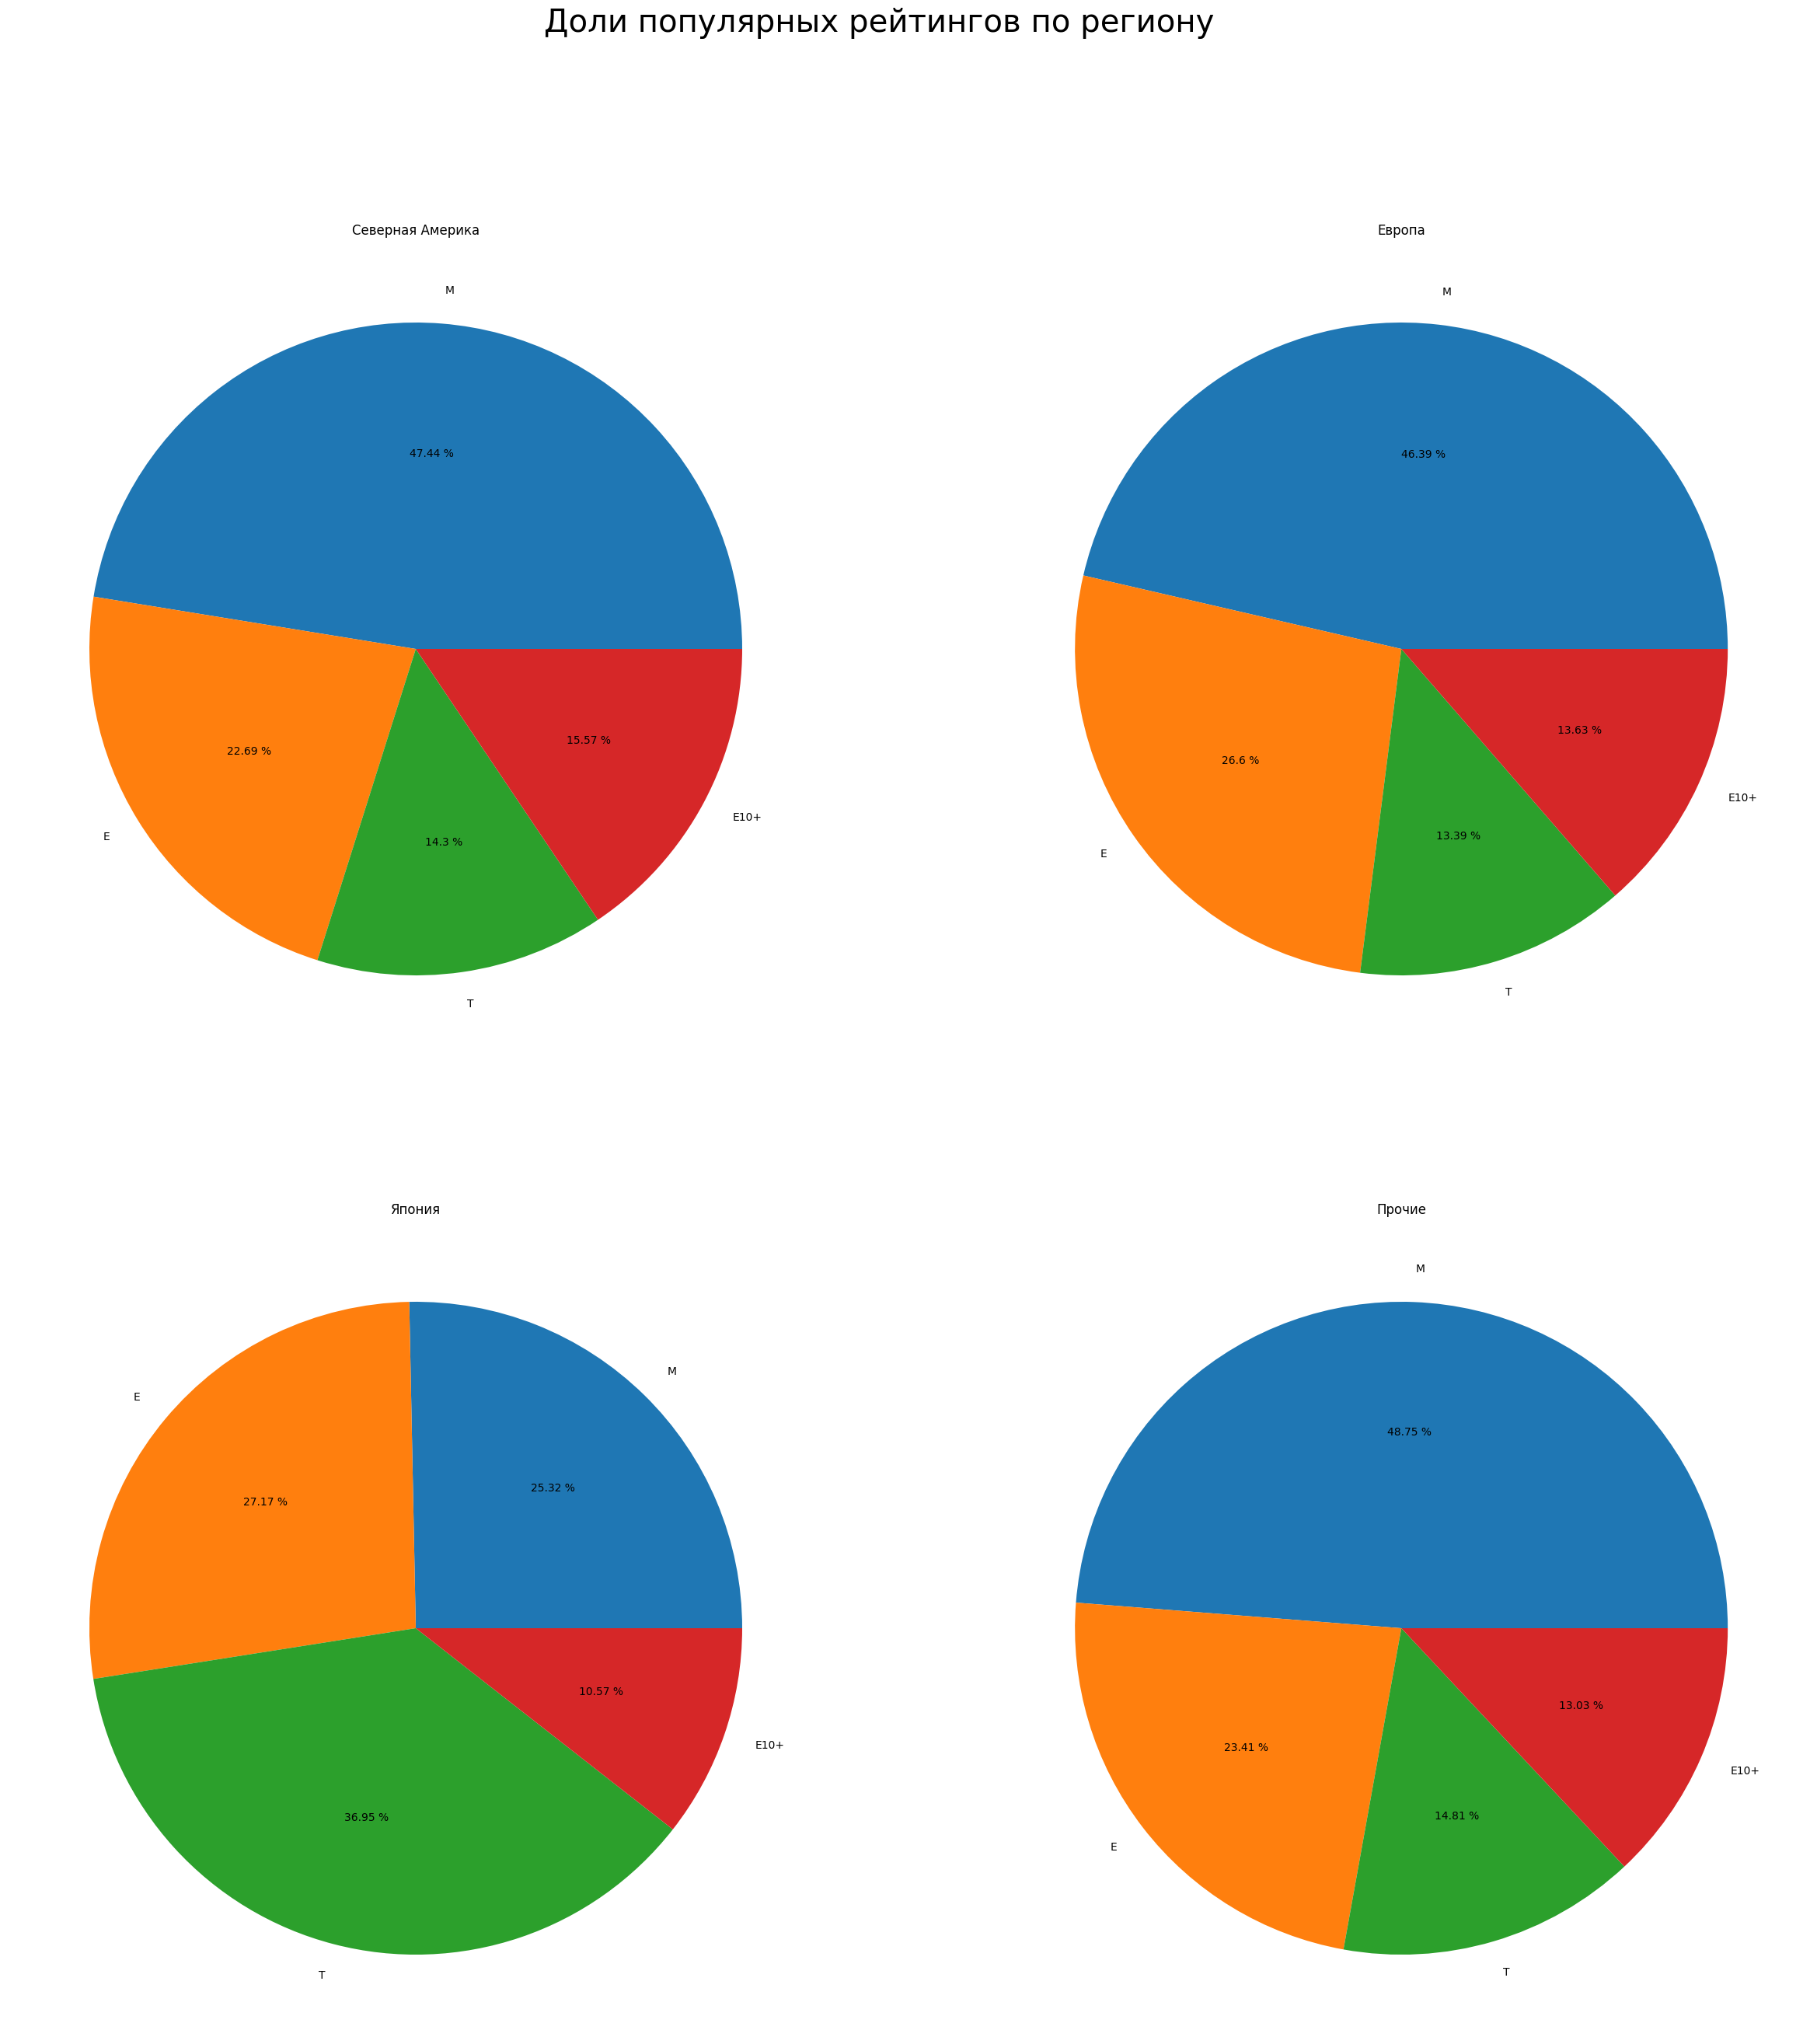

In [68]:
ratio_regions = ['ratio_na', 'ratio_eu', 'ratio_jp', 'ratio_other']
name_regions = ['Северная Америка', 'Европа', 'Япония', 'Прочие']
name_rating = 'M', 'E', 'T', 'E10+'
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(30,30))
fig.suptitle('Доли популярных рейтингов по региону', fontsize=29)

axs[0,0].pie(df_regions_rating[ratio_regions[0]], autopct = lambda x:f"{round(x,2)} %", labels = name_rating)
axs[0,0].set_title(name_regions[0])
axs[0,1].pie(df_regions_rating[ratio_regions[1]], autopct = lambda x:f"{round(x,2)} %", labels = name_rating)
axs[0,1].set_title(name_regions[1])
axs[1,0].pie(df_regions_rating[ratio_regions[2]], autopct = lambda x:f"{round(x,2)} %", labels = name_rating)
axs[1,0].set_title(name_regions[2])
axs[1,1].pie(df_regions_rating[ratio_regions[3]], autopct = lambda x:f"{round(x,2)} %", labels = name_rating)
axs[1,1].set_title(name_regions[3])

plt.show()

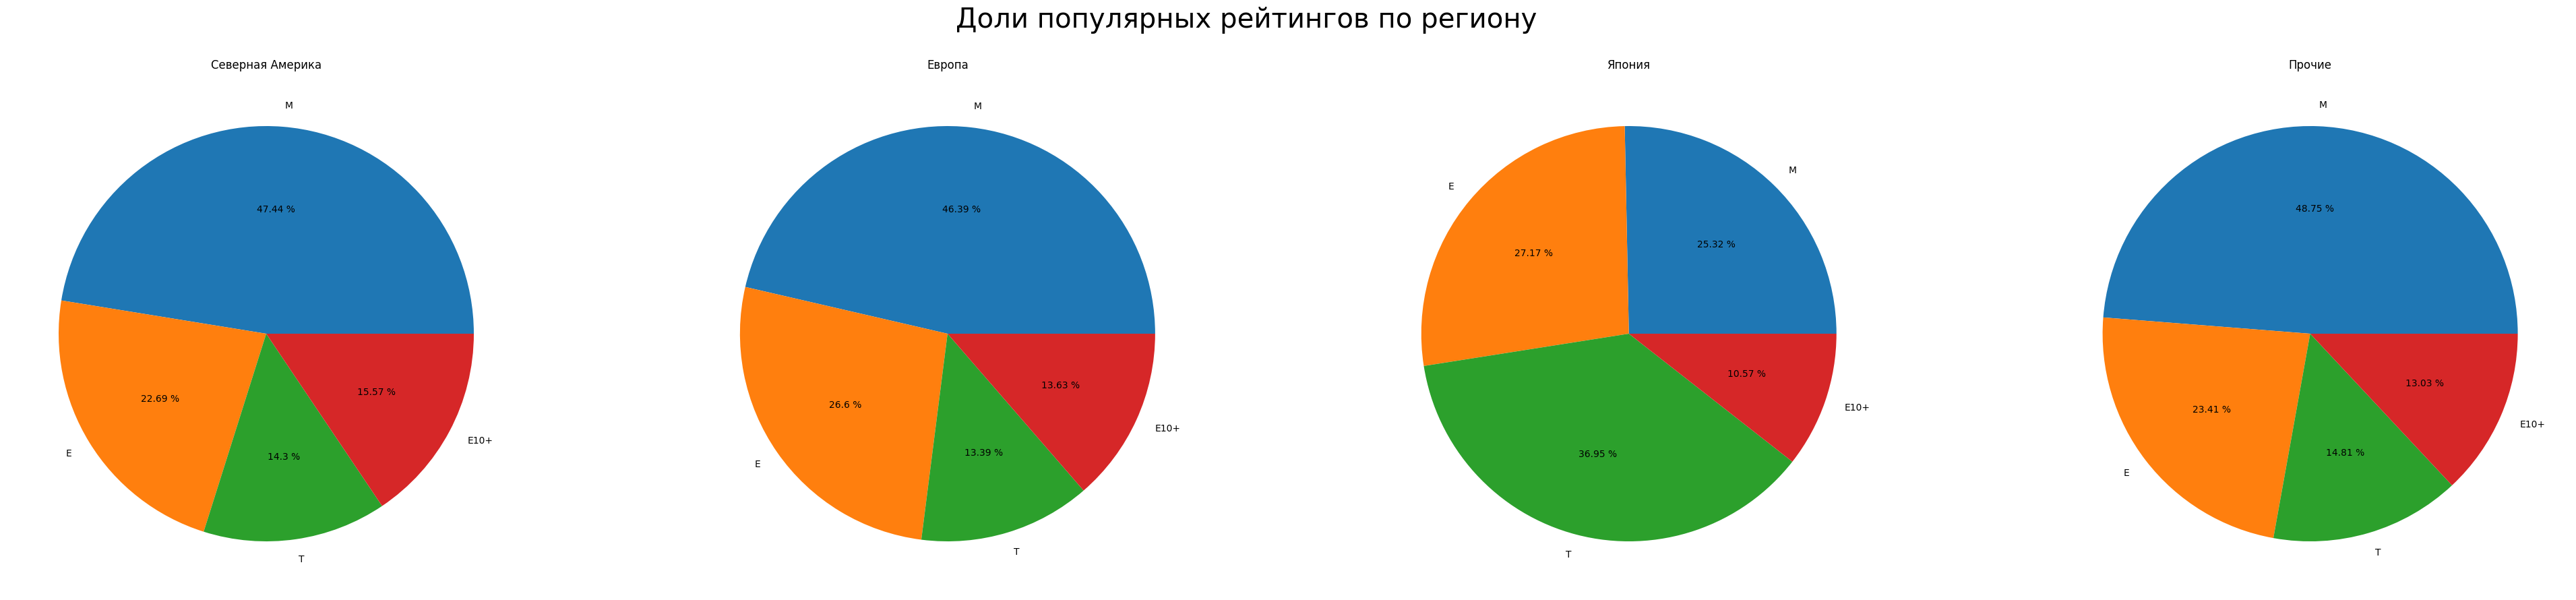

In [69]:
ratio_regions = ['ratio_na', 'ratio_eu', 'ratio_jp', 'ratio_other']
name_rating = 'M', 'E', 'T', 'E10+'
name_regions = ['Северная Америка', 'Европа', 'Япония', 'Прочие']
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(50,10))
fig.suptitle('Доли популярных рейтингов по региону', fontsize=29)

for i in range(4):

    axs[i].pie(df_regions_rating[ratio_regions[i]], autopct = lambda x:f"{round(x,2)} %", labels = name_rating)
    axs[i].set_title(name_regions[i])

Доли пяти наиболее популярных рейтингов по региону Северная Америка


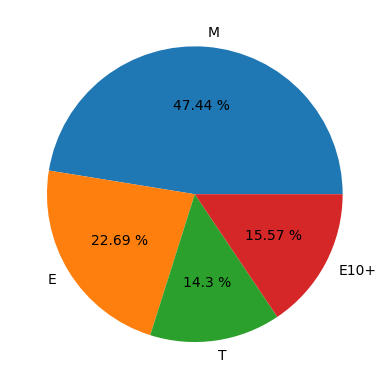

------------------------------------------------
Доли пяти наиболее популярных рейтингов по региону Европа


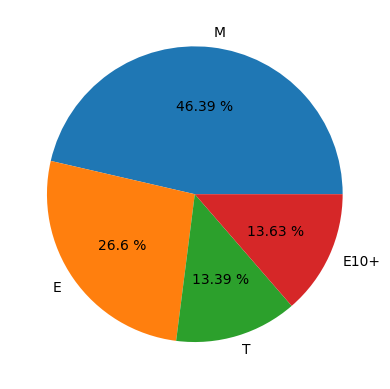

------------------------------------------------
Доли пяти наиболее популярных рейтингов по региону Япония


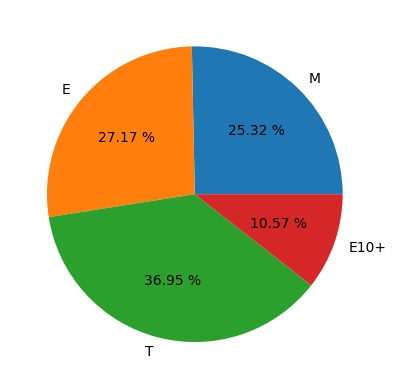

------------------------------------------------
Доли пяти наиболее популярных рейтингов по региону Прочие


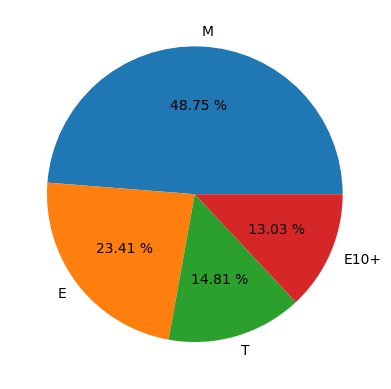

------------------------------------------------


In [70]:
ratio_regions = ['ratio_na', 'ratio_eu', 'ratio_jp', 'ratio_other']
name_regions = ['Северная Америка', 'Европа', 'Япония', 'Прочие']
for i,y in zip(ratio_regions, name_regions):
    print('Доли пяти наиболее популярных рейтингов по региону', y)
    df_regions_rating[i].plot(kind = 'pie', autopct = lambda x:f"{round(x,2)} %")
#    plt.title('Доли пяти наиболее популярных жанров по региону', i)
    plt.ylabel('')
    plt.show()
    print('------------------------------------------------')

**Вывод:**

Структура возрастных рейтингов также похожа в регионах Северная Америка, Европа и прочие. Основную долю ок 50% занимает рейтинг М (для взрослых, старше 17л), 23% (Северная Америка и прочие) и 27% (Европа) занимет рейтинг E (для всех категорий, старше 6 лет). 13-14% - доля попарно рейтингов Е10+ (дети старше 10л) и Т (подростки от 13л).

В Японии доля игр с рейтингами Е и Е10+ такая же. Доля игр М сокращена до 25% за счет смещения продаж в сегмент Т (37%). Это говорит о том, что японцы предпочитают более мирные варианты игр.

  В Северной Америке, Европе и прочих регионах популярностью пользуются жанры action, shooter, sports. Role-playing пользуется меньшей популярностью. Распределение популярности рейтингов соответствуют игровым жанрам: 50% занимает рейтинг М (для взрослых), 27% в сумме за рейтингами Т и Е10+, ок 25% - рейтинг Е (для всех старше 6л).
  Структура популярности жанров в Японии смещена в сторону role-playing (50%) при сохранении позиций action (почти треть). Таким образом, структура популярности возрастных рейтингов так же смещена с сегмента M (25%) в сегмент Т (37%).
  
  По популярности платформ в Европе и прочих регионах предпочтение отдается в значительной степени ps4 (более 40%), также популярна ps3 (20-25%), внимание уделяется xone и x360 (в сумме 27%).
  В Северной Америке тройку лидеров составляют ps4, xone и x360 (28%, 24%, 21% соответственно), доля ps3 незначительна (16%).
  Последняя в рейтинге по полуряности в других регионах платформа 3ds в Японии занимает почти 50% продаж. Затем идет тройка ps3, psv и ps4 с долями 17%, 13% и 11% соответственно.
    
  Таким образом, в Европе, Северной Америке и прочих регионах предпочтение отдается более активным играм в соответствующей возрастной категории "для взрослых". В Японии наиболее популярен жанр role-playing с соответствующей возрастной категорией T и более спокойные игры, хотя action тоже пользуется спросом, хотя не в такой степени, как по другим регионам.

## Статистический анализ и проверка гипотез

In [71]:
df_score_xone = df.query('platform == "xone"')
df_score_pc = df.query('platform == "pc"')
df_score_action = df.query('genre == "action"')
df_score_sports = df.query('genre == "sports"')

print('Длина выборки пользовательских рейтингов по платформе xone:', len(df_score_xone['user_score']),
    ', cреднее:', df_score_xone.user_score.mean(), ', дисперсия:', np.var(df_score_xone['user_score']))

print('Длина выборки пользовательских рейтингов по платформе pc:', len(df_score_pc['user_score']),
      ', cреднее:', df_score_pc.user_score.mean(), ', дисперсия:', np.var(df_score_pc['user_score']))
print('Разница в дисперсиях: {:.0%}'.format((np.var(df_score_pc['user_score']) - np.var(df_score_xone['user_score'])) / np.var(df_score_pc['user_score'])))

print('')

print('Длина выборки пользовательских рейтингов по жанру action:', len(df_score_action['user_score']),
      ', cреднее:', df_score_action.user_score.mean(), ', дисперсия:', np.var(df_score_action['user_score']))

print('Длина выборки пользовательских рейтингов по жанру sports:', len(df_score_sports['user_score']),
      ', cреднее:', df_score_sports.user_score.mean(), ', дисперсия:', np.var(df_score_sports['user_score']))
print('Разница в дисперсиях: {:.0%}'.format((np.var(df_score_sports['user_score']) - np.var(df_score_action['user_score'])) / np.var(df_score_sports['user_score'])))


Длина выборки пользовательских рейтингов по платформе xone: 247 , cреднее: 6.5861716 , дисперсия: 1.4684782
Длина выборки пользовательских рейтингов по платформе pc: 957 , cреднее: 7.089221 , дисперсия: 1.8963633
Разница в дисперсиях: 23%

Длина выборки пользовательских рейтингов по жанру action: 3175 , cреднее: 7.030096 , дисперсия: 1.2040682
Длина выборки пользовательских рейтингов по жанру sports: 2125 , cреднее: 7.118353 , дисперсия: 1.6043311
Разница в дисперсиях: 25%


Так как длины выборок неравны, то при расчете p-value будем использовать параметр equal_var = False для отдельного расчета выборочных дисперсий. Так же видим, что разница в дисперсиях больше 5%, поэтому выборочные дисперсии рассчитывать нужно по отдельности в любом случае.

### Проверка гипотезы равенства средних пользовательских рейтингов платформ xone и pc  

Нулевую гипотезу сформулируем так: средний пользовательский рейтинг по платформе xone НЕ РАВЕН среднему пользовательскому рейтингу по платформе pc. Альтернативная гипотеза: средний пользовательский рейтинг xone РАВЕН среднему пользовательскому рейтингу pc.

Это двусторонняя гипотеза проверки средних двух независимых генеральных совокупностей по выборочным средним и выборочной дисперсии. Определим уровень критической значимости 1%.

Рассчитаем p-value - вероятность получить такое или большее различие случайно между средними значениями пользовательских рейтингов двух совокупностей. Если значение данной вероятности (площадь графика под интервалом значений, p-value) будет меньше, чем уровень критической значимости (alpha), тогда нулевую гипотезу отвергаем и принимаем альтернативную гипотезу.

In [72]:
alpha = 0.01

results_platform = st.ttest_ind(df_score_xone['user_score'], df_score_pc['user_score'], equal_var = False)

print('Значение p-value: {:.10f}'.format(results_platform.pvalue))
if results_platform.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 0.0000000309
Отвергаем нулевую гипотезу


**Вывод:**

 Тк значение p-value слишком мало, намного меньше, чем уровень критической значимости (alpha), нулевую гипотезу отвергаем и принимаем альтернативную гипотезу: средний пользовательский рейтинг xone РАВЕН среднему пользовательскому рейтингу pc.

### Проверка гипотезы неравенства средних пользовательских рейтингов жанров action и sports  

Нулевую гипотезу сформулируем так: средний пользовательский рейтинг по жанру action РАВЕН среднему пользовательскому рейтингу по жанру sports. Альтернативная гипотеза: средний пользовательский рейтинг action НЕ РАВЕН среднему пользовательскому рейтингу sports.

Это двусторонняя гипотеза проверки средних двух независимых генеральных совокупностей по выборочным средним и выборочной дисперсии. Определим уровень критической значимости 1%.

Рассчитаем p-value - вероятность получить такое или большее различие случайно между средними значениями пользовательских рейтингов двух совокупностей. Если значение данной вероятности (площадь графика под интервалом значений, p-value) будет меньше, чем уровень критической значимости (alpha), тогда нулевую гипотезу отвергаем и принимаем альтернативную гипотезу.

In [73]:
alpha = 0.01

results_genre = st.ttest_ind(df_score_action['user_score'], df_score_sports['user_score'], equal_var = False)

print('Значение p-value: {:.4f}'.format(results_genre.pvalue))
if results_genre.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 0.0088
Отвергаем нулевую гипотезу


**Вывод:**

Тк значение p-value достаточно мало, меньше, чем уровень критической значимости (alpha), нулевую гипотезу отвергаем и принимаем альтернативную гипотезу: средний пользовательский рейтинг action НЕ РАВЕН среднему пользовательскому рейтингу sports. Но поскольку p-value лишь немногим меньше уровень критической значимости, мы можем утверждать, что нашли нечто значимое. То есть на некоторых других выборочных данных есть вероятность, что средние пользовательские рейтинги жанров action и sports окажутся равными.

## Общие выводы

Наиболее перспективной на 2017 год выглядит платформа ps4, по платформам ps3 и x360 продажи значительно упали, но еще идут, незначительные продажи скорей всего сохранятся также по платформам 3ds и pc, xone. Продажи wiiu и pcv вероятны, но очень несущественны, можно не принимать во внимание. Возможно, следует ожидать появления новой версии платформы 3ds (на смену более продаваемой ds).

По актуальному периоду с 2013г имеем скошенность продаж жанров влево. Продажи жанра action значительно снижаются к концу периода, к 2016г. Таким образом, продажи жанров выравниваются. И жанр shooter выходит в лидеры с незначительным опережением action. Sports и role-playing также достаточно популярны.

В Северной Америке, Европе и прочих регионах популярностью пользуются жанры action, shooter, sports. Role-playing пользуется меньшей популярностью. Распределение популярности рейтингов соответствуют игровым жанрам: 50% занимает рейтинг М (для взрослых), 27% в сумме за рейтингами Т и Е10+, ок 25% - рейтинг Е (для всех старше 6л).
Структура популярности жанров в Японии смещена в сторону role-playing (50%) при сохранении позиций action (почти треть). Таким образом, структура популярности возрастных рейтингов так же смещена с сегмента M (25%) в сегмент Т (37%).
По популярности платформ в Европе и прочих регионах предпочтение отдается в значительной степени ps4 (более 40%), также популярна ps3 (20-25%), внимание уделяется xone и x360 (в сумме 27%).
В Северной Америке тройку лидеров составляют ps4, xone и x360 (28%, 24%, 21% соответственно), доля ps3 незначительна (16%).
Последняя в рейтинге по полуряности в других регионах платформа 3ds в Японии занимает почти 50% продаж. Затем идет тройка ps3, psv и ps4 с долями 17%, 13% и 11% соответственно.

Таким образом, в Европе, Северной Америке и прочих регионах предпочтение отдается более активным играм в соответствующей возрастной категории "для взрослых". В Японии наиболее популярен жанр role-playing с соответствующей возрастной категорией T и более спокойные игры, хотя action тоже пользуется спросом, хотя не в такой степени, как по другим регионам.

Оценки пользователей не оказывают значительного влияния на продажи.

Также в ходе исследования были рассчитаны доли продаж по регионам: 40% Сев Америка, 36% Европа, 11% прочие регионы со схожей структурой платформ (аналогично Европе) и жанров (Европе и Северной Америке), Япония с долей продаж 13% стоит особняком по структуре жанров и платформ.

В связи со всем вышеизложенным при планировании рекламных кампаний на следующий год коммерческому департаменту следует обратить внимание на следующие моменты.

По платформам:
* в Европе и прочих регионах: ps4, ps3, также x360 и xone.
* в Сев Америке: ps4, x360 и xone, также ps3.
* в Японии: 3ds, также ps4, ps3.

По жанрам:
* в Сев Америке, Европе и пр регионах: action, shooter, sports.
* в Японии: role-playing и action.